In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

## Парсинг данных о энергопотреблении

In [2]:
def get_tests_from_csv_tutor(path: str):
    dict_from_csv = pd.read_csv(path).to_dict()
    # print(dict_from_csv)
    return dict_from_csv


def create_path_list(root_path: str, path_names, names=None):
    if names == None:
        names = path_names

    result_lst = []
    for i in range(len(path_names)):
        result_lst.append((root_path + '\\' + path_names[i], names[i]))
    return result_lst


def get_lots_tset_dict_csv_tutor(list_paths):
    result_dic = dict()
    for path, name in list_paths:
        result_dic[name] = get_tests_from_csv_tutor(path)

    return result_dic


def get_dict_for_test_set(flag_args=False, dirs_names=None):
    if flag_args:
        root_path = dirs_names['root_dir']
        num_test_cases = dirs_names['tests_case_number']
    else:
        root_path = input("type directory of test results: ")
        num_test_cases = int(input("type number of test cases: "))

    names = []
    path_names = []

    for i in range(num_test_cases):
        if flag_args:
            path_name = dirs_names['path_names'][i]
            name = dirs_names['names'][i]
        else:
            path_name = input(f"type path to the result of test case {i}: ")
            name = input(f"type test case {i} name: ")

        path_names.append(path_name)
        names.append(name)

    path_list = create_path_list(root_path, path_names, names)
    test_res_dict = get_lots_tset_dict_csv_tutor(path_list)
    return test_res_dict


def get_dict_of_multiple_test_set(flag_args=False, sets_num=0, sets_name=None, set_dirs_names=None):
    if flag_args:
        num_test_sets = sets_num
    else:
        num_test_sets = int(input("type number of test sets: "))

    set_names = []
    result_dict = dict()

    for i in range(num_test_sets):
        if flag_args:
            set_name = sets_name[i]
        else:
            set_name = input("type test set name: ")

        set_names.append(set_name)

    for name in set_names:
        print(f"loading test set {name}")
        result_dict[name] = get_dict_for_test_set(flag_args, set_dirs_names[name])

    return result_dict


In [3]:
sets = 2
sets_name = ['default', 'modified']
set_disrs = {
    'default': {'root_dir': 'D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_default', 'tests_case_number': 5,
                 'path_names': ['notes\\note_power.txt', 
                                'reading\\read_power.txt', 
                                'watching\\watch_power.txt',
                                'gaming\\game_power.txt', 
                                'youtube\\youtube_power.txt'],
                 'names': ['note', 'read', 'watch', 'game', 'youtube']
               },
    
     'modified': {'root_dir': 'D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_modified',
                  'tests_case_number': 5,
                  'path_names': ['notes\\note_power.txt', 
                                 'reading\\read_power.txt', 
                                 'watching\\watch_power.txt',
                                 'gaming\\game_power.txt', 
                                 'youtube\\youtube_power.txt'],
                  'names': ['note', 'read', 'watch', 'game', 'youtube']
                 }
}

In [4]:
result = get_dict_of_multiple_test_set(True, sets, sets_name, set_disrs)

loading test set default
loading test set modified


In [5]:
result

{'default': {'note': {'avg_power': {0: 386, 1: 351, 2: 348, 3: 383},
   'curr_power': {0: 411, 1: 346, 2: 343, 3: 354}},
  'read': {'avg_power': {0: 343, 1: 340, 2: 340, 3: 340},
   'curr_power': {0: 348, 1: 342, 2: 340, 3: 338}},
  'watch': {'avg_power': {0: 616, 1: 617, 2: 614, 3: 602},
   'curr_power': {0: 509, 1: 532, 2: 509, 3: 521}},
  'game': {'avg_power': {0: 693, 1: 702, 2: 693, 3: 702},
   'curr_power': {0: 572, 1: 571, 2: 570, 3: 573}},
  'youtube': {'avg_power': {0: 901, 1: 829, 2: 815, 3: 812},
   'curr_power': {0: 667, 1: 596, 2: 583, 3: 551}}},
 'modified': {'note': {'avg_power': {0: 348, 1: 346, 2: 346, 3: 346},
   'curr_power': {0: 341, 1: 340, 2: 344, 3: 340}},
  'read': {'avg_power': {0: 339, 1: 340, 2: 338, 3: 338},
   'curr_power': {0: 339, 1: 340, 2: 342, 3: 340}},
  'watch': {'avg_power': {0: 628, 1: 601, 2: 605, 3: 612},
   'curr_power': {0: 502, 1: 504, 2: 503, 3: 516}},
  'game': {'avg_power': {0: 698, 1: 703, 2: 703, 3: 690},
   'curr_power': {0: 598, 1: 573,

In [6]:
test_names = list(result['default'].keys())
x_pos = np.arange(0, 2 * len(test_names), 2)

default_res = [np.mean(list(result['default']['note']['avg_power'].values())),
            np.median(list(result['default']['read']['avg_power'].values())),
            np.median(list(result['default']['watch']['avg_power'].values())),
            np.median(list(result['default']['game']['avg_power'].values())),
            np.median(list(result['default']['youtube']['avg_power'].values()))]

default_error = [np.std(list(result['default']['note']['avg_power'].values())),
            np.std(list(result['default']['read']['avg_power'].values())),
            np.std(list(result['default']['watch']['avg_power'].values())),
            np.std(list(result['default']['game']['avg_power'].values())),
            np.std(list(result['default']['youtube']['avg_power'].values()))]

nodified_res = [np.mean(list(result['modified']['note']['avg_power'].values())),
            np.median(list(result['modified']['read']['avg_power'].values())),
            np.median(list(result['modified']['watch']['avg_power'].values())),
            np.median(list(result['modified']['game']['avg_power'].values())),
            np.median(list(result['modified']['youtube']['avg_power'].values()))]

modified_error = [np.std(list(result['modified']['note']['avg_power'].values())),
            np.std(list(result['modified']['read']['avg_power'].values())),
            np.std(list(result['modified']['watch']['avg_power'].values())),
            np.std(list(result['modified']['game']['avg_power'].values())),
            np.std(list(result['modified']['youtube']['avg_power'].values()))]

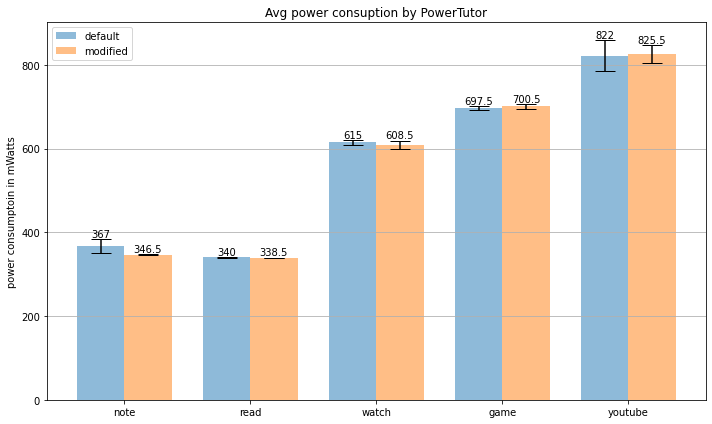

In [7]:
matplotlib.rcParams['figure.figsize'] = [10, 6]
fig, ax = plt.subplots()

N = 5
width = 0.75         # the width of the bars

# x_pos = np.arange(0, 9, 2)

bar_def = ax.bar(x_pos, default_res, width, yerr=default_error, align='center', alpha=0.5, ecolor='black', capsize=10)
bar_mod = ax.bar(x_pos + width, nodified_res, width, yerr=modified_error, align='center', alpha=0.5, ecolor='black', capsize=10)



ax.set_ylabel('power consumptoin in mWatts')
ax.set_xticks([pos + 0.5 * width for pos in x_pos])
ax.set_xticklabels(test_names)
ax.set_title('Avg power consuption by PowerTutor')
ax.yaxis.grid(True)
ax.bar_label(bar_def)
ax.bar_label(bar_mod)
ax.legend((bar_def[0], bar_mod[0]), ('default', 'modified'))
plt.tight_layout()
plt.savefig('Avg_power_PowerTutor.png')
plt.show()

In [8]:
test_names = list(result['default'].keys())
x_pos = np.arange(0, 2 * len(test_names), 2)

default_res = [np.mean(list(result['default']['note']['curr_power'].values())),
            np.median(list(result['default']['read']['curr_power'].values())),
            np.median(list(result['default']['watch']['curr_power'].values())),
            np.median(list(result['default']['game']['curr_power'].values())),
            np.median(list(result['default']['youtube']['curr_power'].values()))]

default_error = [np.std(list(result['default']['note']['curr_power'].values())),
            np.std(list(result['default']['read']['curr_power'].values())),
            np.std(list(result['default']['watch']['curr_power'].values())),
            np.std(list(result['default']['game']['curr_power'].values())),
            np.std(list(result['default']['youtube']['curr_power'].values()))]

nodified_res = [np.mean(list(result['modified']['note']['curr_power'].values())),
            np.median(list(result['modified']['read']['curr_power'].values())),
            np.median(list(result['modified']['watch']['curr_power'].values())),
            np.median(list(result['modified']['game']['curr_power'].values())),
            np.median(list(result['modified']['youtube']['curr_power'].values()))]

modified_error = [np.std(list(result['modified']['note']['curr_power'].values())),
            np.std(list(result['modified']['read']['curr_power'].values())),
            np.std(list(result['modified']['watch']['curr_power'].values())),
            np.std(list(result['modified']['game']['curr_power'].values())),
            np.std(list(result['modified']['youtube']['curr_power'].values()))]

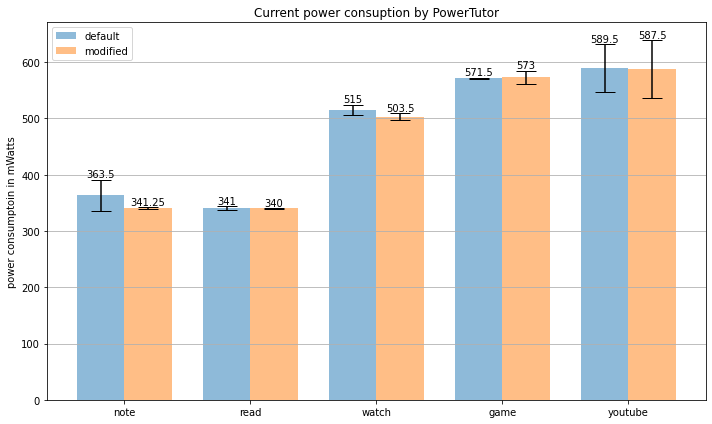

In [9]:
matplotlib.rcParams['figure.figsize'] = [10, 6]
fig, ax = plt.subplots()

N = 5
width = 0.75         # the width of the bars

# x_pos = np.arange(0, 9, 2)

bar_def = ax.bar(x_pos, default_res, width, yerr=default_error, align='center', alpha=0.5, ecolor='black', capsize=10)
bar_mod = ax.bar(x_pos + width, nodified_res, width, yerr=modified_error, align='center', alpha=0.5, ecolor='black', capsize=10)



ax.set_ylabel('power consumptoin in mWatts')
ax.set_xticks([pos + 0.5 * width for pos in x_pos])
ax.set_xticklabels(test_names)
ax.set_title('Current power consuption by PowerTutor')
ax.yaxis.grid(True)
ax.bar_label(bar_def)
ax.bar_label(bar_mod)
ax.legend((bar_def[0], bar_mod[0]), ('default', 'modified'))
plt.tight_layout()
plt.savefig('curr_power_PowerTutor.png')
plt.show()

данные по powerTutor https://ziyang.eecs.umich.edu/projects/powertutor/changelist.html

## Парсинг данных о состоянии простоя

In [10]:
def get_test_from_txt_idle(path: str, num_tests, file_body_name, test_tails = ["_after.txt", "_before.txt"]):
    """
    test_tails = ["_after.txt", "_before.txt"] -- first afrer, second - before
    """
    result_dict = dict()

    for i in range(1, num_tests + 1):
        print(path + '\\' + str(i) + file_body_name + test_tails[0])
        f_after = open(path + '\\' + str(i) + file_body_name + test_tails[0], "r")
        f_before = open(path + '\\' + str(i) + file_body_name + test_tails[1], "r")


        file_flag = True

        while file_flag:
            f_after.readline()
            f_before.readline()

            str_info = f_after.readline().split()
            f_before.readline()

            if str_info[0][0] != 'c':
                str_info = f_after.readline().split()
                f_before.readline()
                if not str_info:
                    file_flag = False
                    continue

            cpu = int(str_info[1])
            state = int(str_info[3])

            if cpu not in result_dict.keys():
                result_dict[cpu] = dict()
            
            if state not in result_dict[cpu].keys():
                result_dict[cpu][state] = dict()
                result_dict[cpu][state]['name'] = dict() 
                result_dict[cpu][state]['desc'] = dict() 
                result_dict[cpu][state]['disable'] = dict()
                result_dict[cpu][state]['latency'] = dict()
                result_dict[cpu][state]['power'] = dict()
                result_dict[cpu][state]['residency'] = dict() 
                result_dict[cpu][state]['usage'] = dict()
                result_dict[cpu][state]['time'] = dict()
            ########################################################################
            result_dict[cpu][state]['name'][i] = f_after.readline().strip()
            result_dict[cpu][state]['desc'][i] = f_after.readline().strip()
            result_dict[cpu][state]['disable'][i] = bool(int(f_after.readline().strip()))
            result_dict[cpu][state]['latency'][i] = int(f_after.readline().strip())
            result_dict[cpu][state]['power'][i] = int(f_after.readline().strip())
            result_dict[cpu][state]['residency'][i] = int(f_after.readline().strip())

            for _ in range(6):
                f_before.readline()

            result_dict[cpu][state]['usage'][i] = int(f_after.readline().strip()) - int(f_before.readline().strip())
            result_dict[cpu][state]['time'][i] = int(f_after.readline().strip()) - int(f_before.readline().strip())

        f_after.close()
        f_before.close()
    return result_dict



def get_dict_for_test_set_idle(flag_args=False, dirs_names=None):
    test_res_dict = dict()
    
    for i in range(len(dirs_names['path_names'])):
        if flag_args:
            path_name = dirs_names['path_names'][i]
            name = dirs_names['names'][i]
            num_tests = dirs_names['num_tests'][i]
            file_body_name = dirs_names['file_body_name'][i]
        else:
            path_name = input(f"type path to the results of test case {i}: ")
            name = input(f"type test case {i} name: ")
            num_tests = int(input(f"type {i} number of tests: "))
            file_body_name = input(f"type {i} file body name: ")
            
        test_res_dict[name] = get_test_from_txt_idle(path_name, num_tests, file_body_name)
    
    return test_res_dict


def get_dict_of_multiple_test_set_idle(flag_args=False, sets_num=0, sets_name=None, set_dirs_names=None):
    if flag_args:
        num_test_sets = sets_num
    else:
        num_test_sets = int(input("type number of test sets: "))

    set_names = []
    result_dict = dict()

    for i in range(num_test_sets):
        if flag_args:
            set_name = sets_name[i]
        else:
            set_name = input("type test set name: ")

        set_names.append(set_name)

    for name in set_names:
        print(f"loading test set {name}")
        result_dict[name] = get_dict_for_test_set_idle(flag_args, set_dirs_names[name])

    return result_dict

In [11]:
test_sets = ['default', 'modified']
set_num = 2
idle_dir_names = {
    'default': {
        'path_names': ['D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_default\\notes',
                       'D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_default\\reading',
                       'D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_default\\watching',
                       'D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_default\\gaming',
                       'D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_default\\youtube'
                       ],
        'names': ['note', 'read', 'watch', 'game', 'youtube'],
        'num_tests': [4, 4, 4, 4, 4],
        'file_body_name': ['note', 'read', 'watch', 'game', 'youtube']
    },
    'modified': {
        'path_names': ['D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_modified\\notes',
                       'D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_modified\\reading',
                       'D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_modified\\watching',
                       'D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_modified\\gaming',
                       'D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_modified\\youtube'],
        'names': ['note', 'read', 'watch', 'game', 'youtube'],
        'num_tests': [4, 4, 4, 4, 4],
        'file_body_name': ['note', 'read', 'watch', 'game', 'youtube']
    }
}

In [12]:
idle_results = get_dict_of_multiple_test_set_idle(True, set_num, test_sets, idle_dir_names)

loading test set default
D:\course_work\adb_Scripts_Tests\Tests\Results_default\notes\1note_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\notes\2note_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\notes\3note_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\notes\4note_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\reading\1read_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\reading\2read_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\reading\3read_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\reading\4read_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\watching\1watch_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\watching\2watch_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\watching\3watch_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\watching\4watch_after.txt
D:\course_work\adb_Scripts_

In [13]:
test_names = list(idle_results['default'].keys())
x_pos = np.arange(0, 2 * len(test_names), 2)

defult_res_idle = dict()
default_error_idle = dict()

for name in ['note', 'read', 'watch', 'game', 'youtube']:
    defult_res_idle[name] = dict()
    default_error_idle[name] = dict()
    for cpu in [0, 1, 2, 3, 4, 5, 6, 7]:
        defult_res_idle[name][cpu] = [
            np.median(list(idle_results['default'][name][cpu][0]['time'].values())),
            np.median(list(idle_results['default'][name][cpu][1]['time'].values()))]
        
        default_error_idle[name][cpu] = [
            np.std(list(idle_results['default'][name][cpu][0]['time'].values())),
            np.std(list(idle_results['default'][name][cpu][1]['time'].values()))]

modified_res_idle = dict()
modified_error_idle = dict()

for name in ['note', 'read', 'watch', 'game', 'youtube']:
    modified_res_idle[name] = dict()
    modified_error_idle[name] = dict()
    for cpu in [0, 1, 2, 3, 4, 5, 6, 7]:
        modified_res_idle[name][cpu] = [
            np.median(list(idle_results['modified'][name][cpu][0]['time'].values())),
            np.median(list(idle_results['modified'][name][cpu][1]['time'].values()))]

        modified_error_idle[name][cpu] = [
            np.std(list(idle_results['modified'][name][cpu][0]['time'].values())),
            np.std(list(idle_results['modified'][name][cpu][1]['time'].values()))]

In [14]:
def show_cpus_plot(t_name, title):
    matplotlib.rcParams['figure.figsize'] = [15, 20]
    fig, ax = plt.subplots(4,2)

    N = 2                # number of idle states
    width = 0.75         # the width of the bars

    x_pos = np.arange(0, 2 * N, 2)

    for i in range(4):
        for j in range(2):
            bar_def = ax[i, j].bar(x_pos, defult_res_idle[t_name][i * 2 + j],
                                   width, yerr=default_error_idle[t_name][i * 2 + j],
                                   align='center', alpha=0.5, ecolor='black', capsize=10)

            bar_mod = ax[i, j].bar(x_pos + width, modified_res_idle[t_name][i * 2 + j],
                                   width, yerr=modified_error_idle[t_name][i * 2 + j],
                                   align='center', alpha=0.5, ecolor='black', capsize=10)
            ax[i, j].set_ylabel('time in microseconds')
            ax[i, j].set_xticks([pos + 0.5 * width for pos in x_pos])
            ax[i, j].set_xticklabels(['state 0', 'state 1'])
            ax[i, j].set_title(f"test {t_name}, cpu {i * 2 + j}", fontsize=12)
            ax[i, j].yaxis.grid(True)
            ax[i, j].bar_label(bar_def, fmt = '%d')
            ax[i, j].bar_label(bar_mod, fmt = '%d')
            ax[i, j].legend((bar_def[0], bar_mod[0]), ('default', 'modified'))

    plt.suptitle(title, y=1, fontsize=15)
    plt.tight_layout()
    plt.savefig(f"{title}.png")
    plt.show()

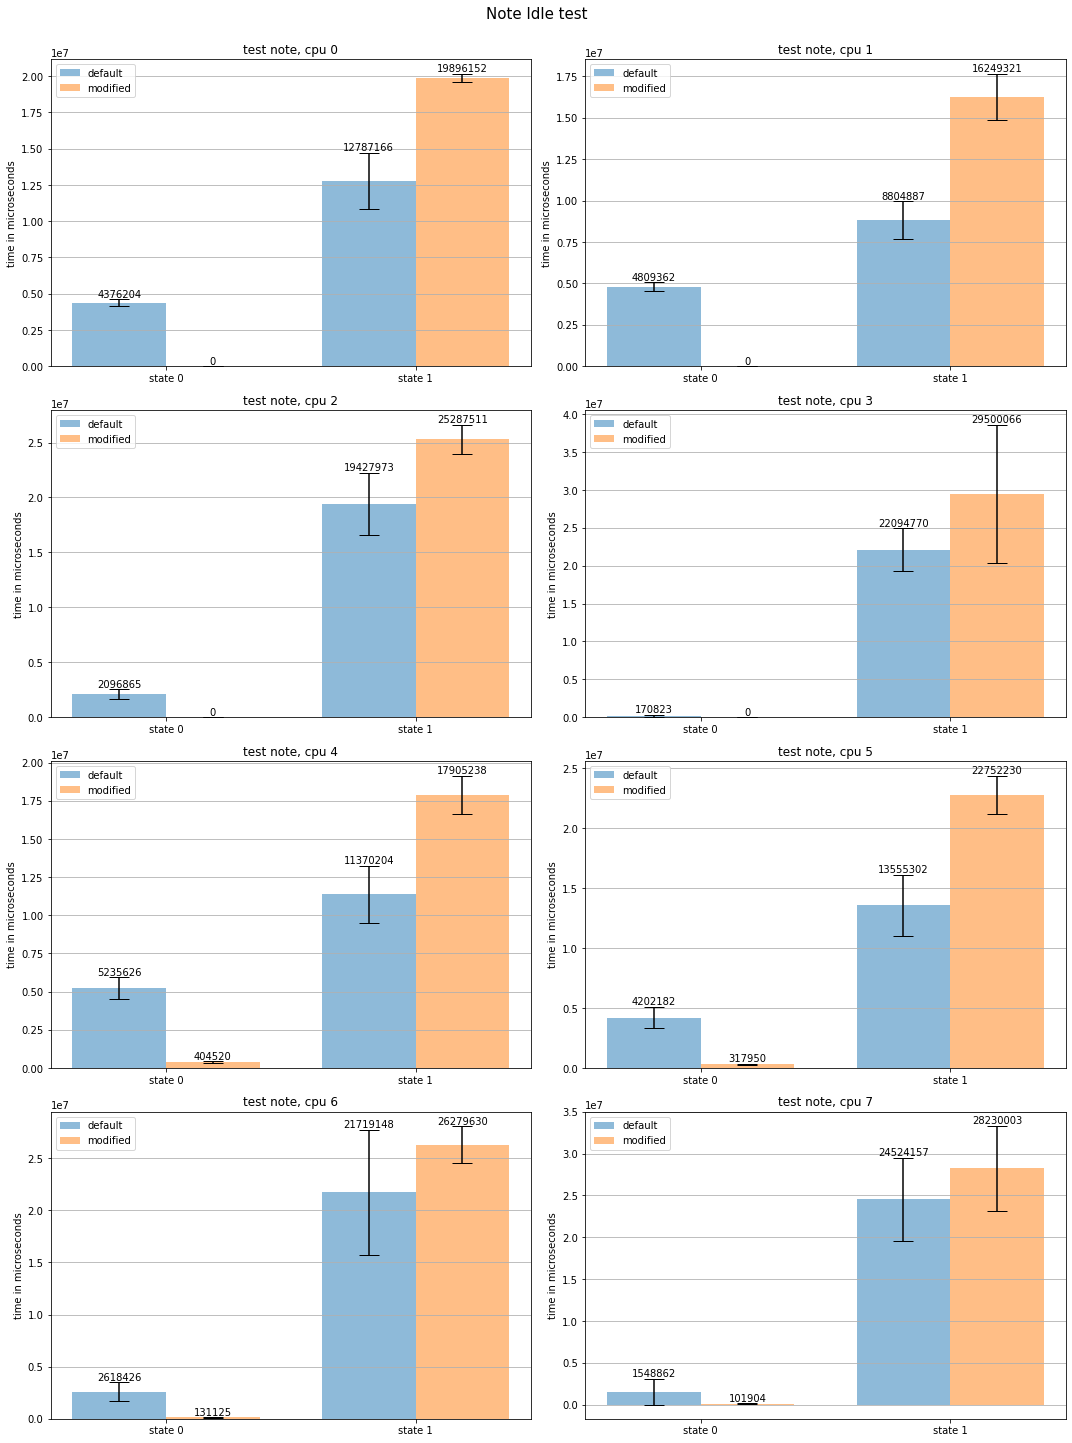

In [15]:
show_cpus_plot("note", "Note Idle test")

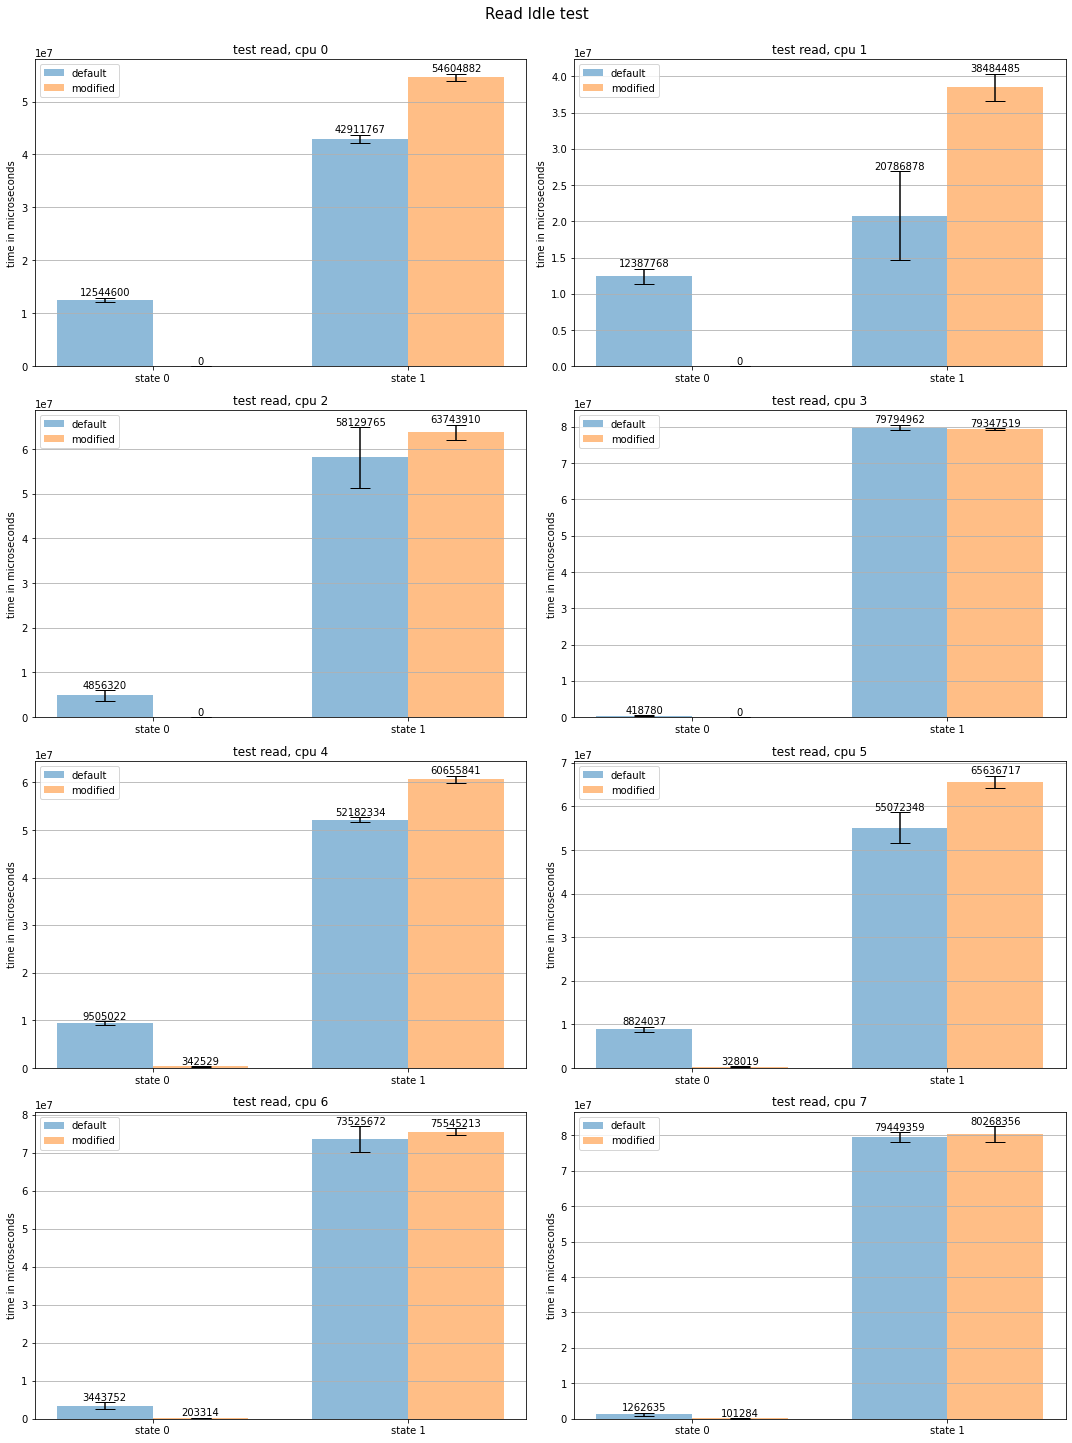

In [16]:
show_cpus_plot("read", "Read Idle test")

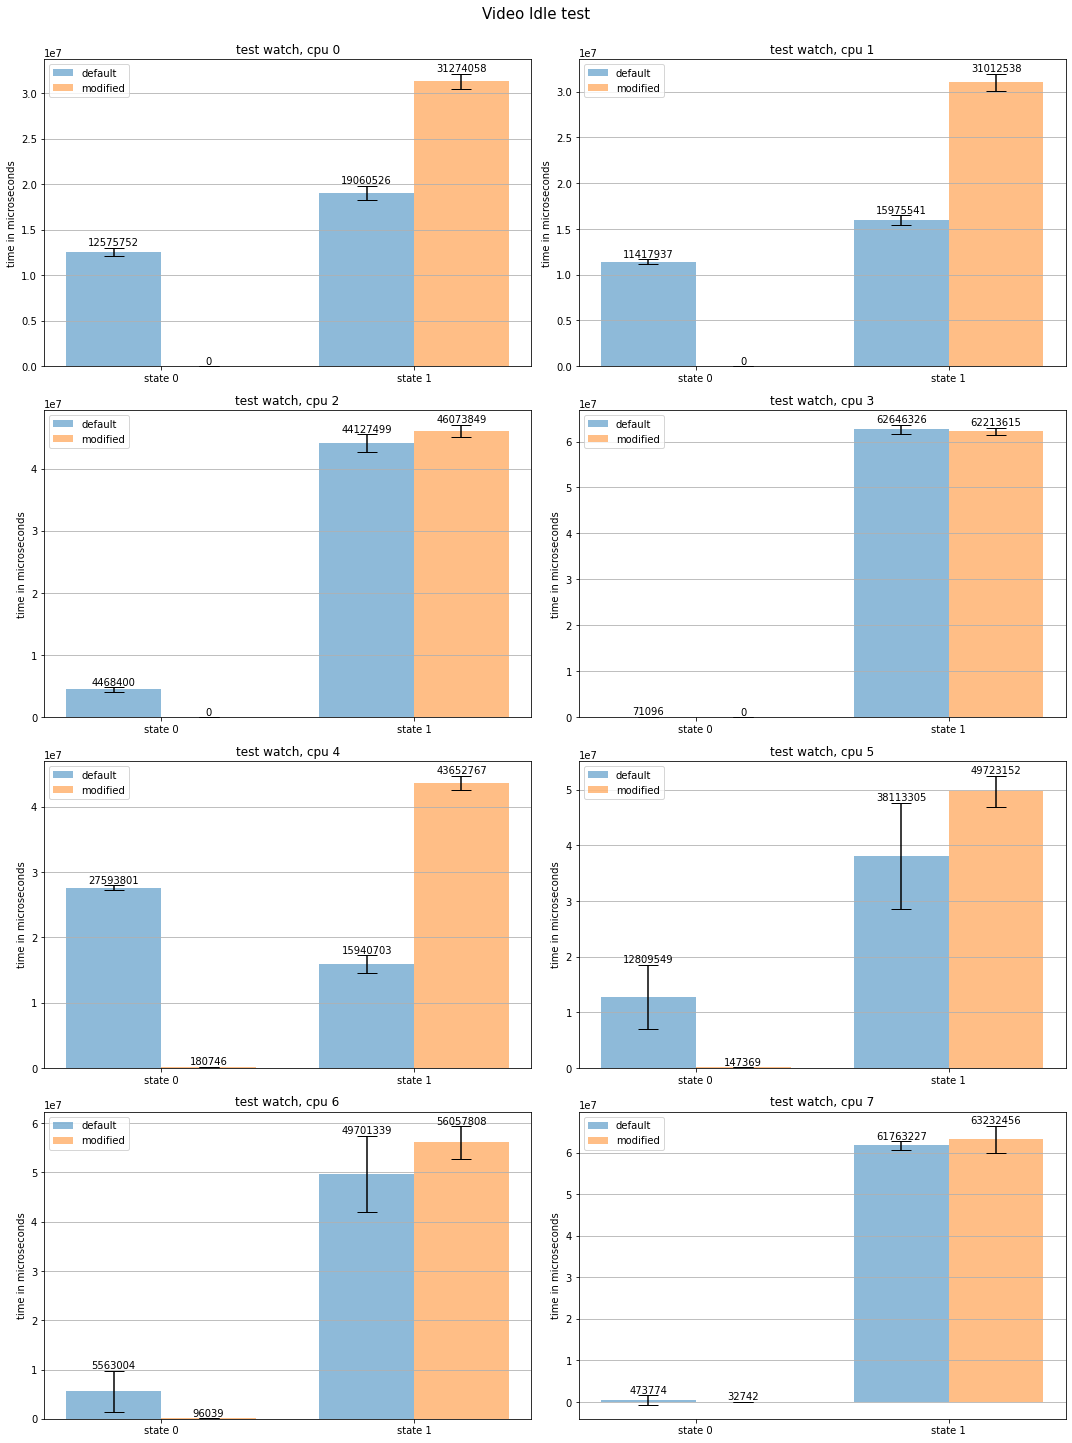

In [17]:
show_cpus_plot("watch", "Video Idle test")

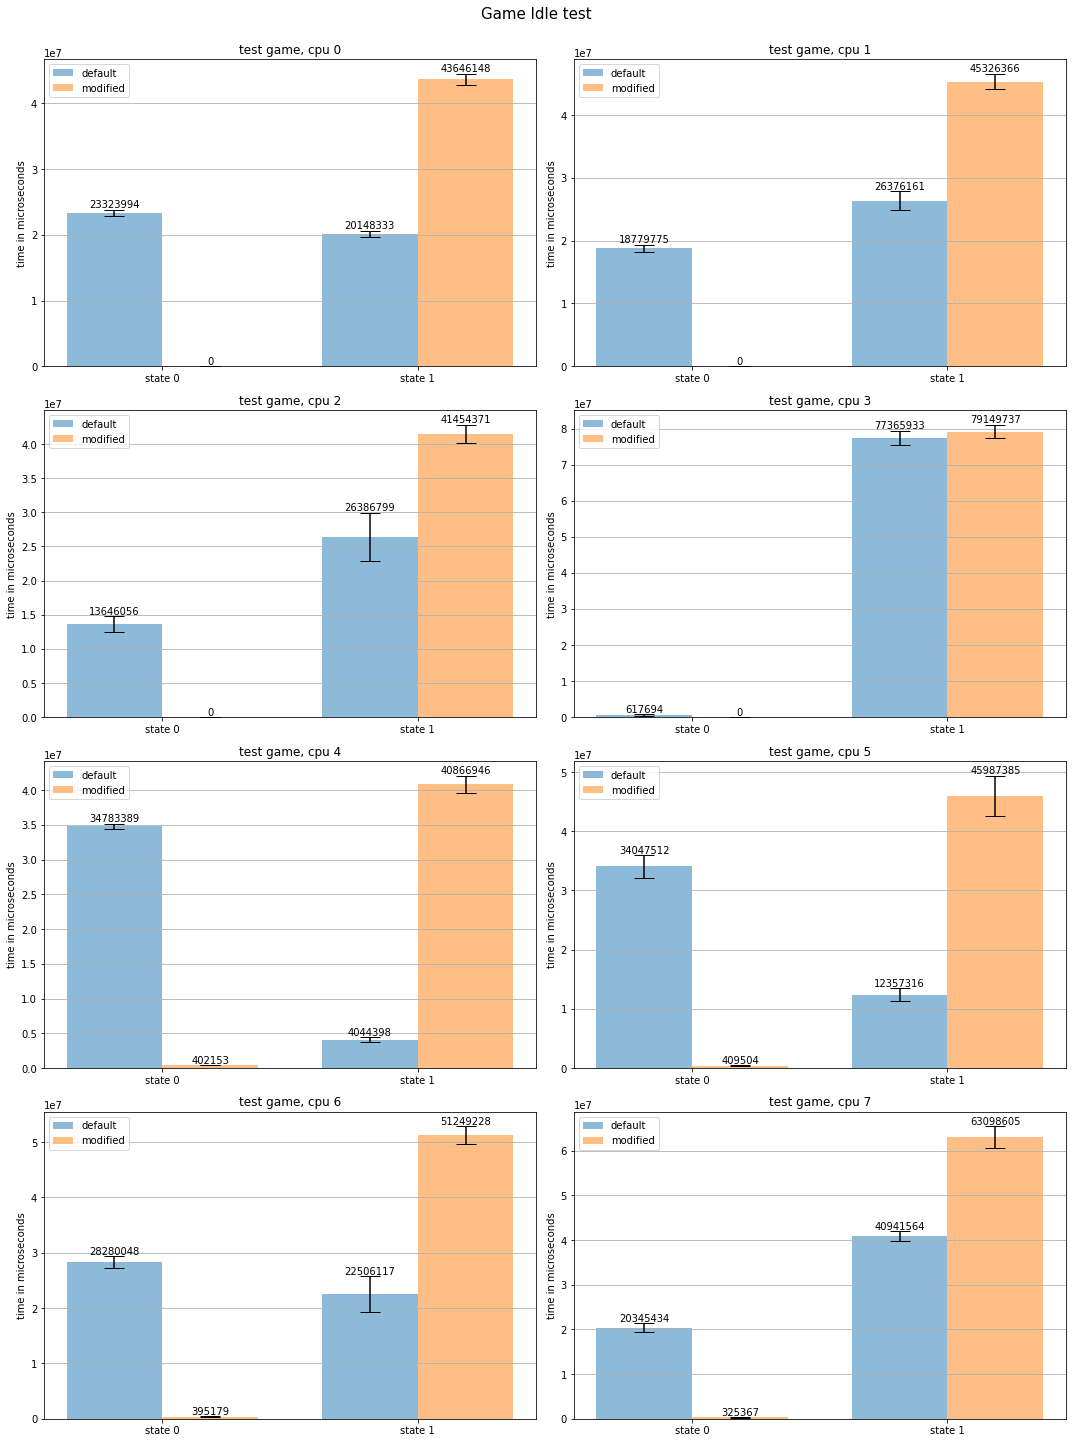

In [18]:
show_cpus_plot("game", "Game Idle test")

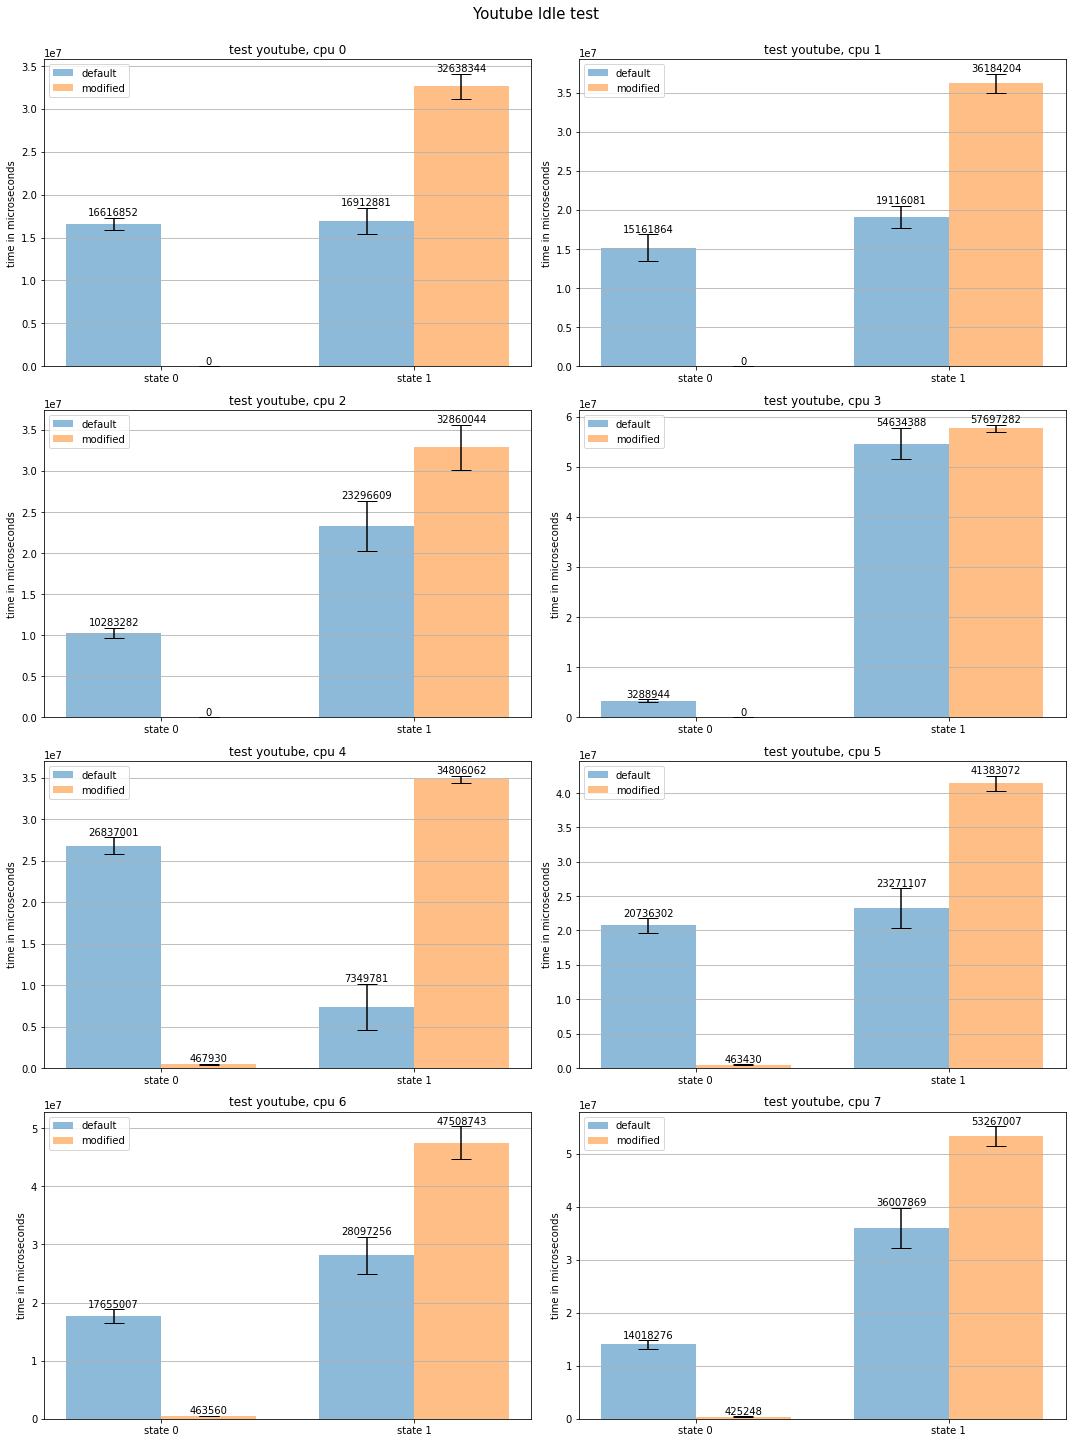

In [19]:
show_cpus_plot("youtube", "Youtube Idle test")

## Парсинг данных о частоте

In [20]:
def get_test_from_txt_freq(path: str, num_tests, file_body_name,
                           test_tails=["_freq_after.txt", "_freq_before.txt"]):
    """
    test_tails = ["_freq_after.txt", "_freq_before.txt"] -- first afrer, second - before
    """
    result_dict = dict()

    for i in range(1, num_tests + 1):
        print(path + '\\' + str(i) + file_body_name + test_tails[0])
        f_after = open(path + '\\' + str(i) + file_body_name + test_tails[0], "r")
        f_before = open(path + '\\' + str(i) + file_body_name + test_tails[1], "r")

        file_flag = True
        f_after.readline()
        f_before.readline()

        while file_flag:

            str_info = f_after.readline().split()
            f_before.readline()

            if str_info[0][0] != 'c':
                file_flag = False
                continue

            cpu = int(str_info[1])

            if cpu not in result_dict.keys():
                result_dict[cpu] = dict()

            data_str = f_after.readline()
            data_b_str = f_before.readline()
            while len(data_str.split()) == 2:
                freq = int(data_str.split()[0])
                time = int(data_str.split()[1]) - int(data_b_str.split()[1])

                if freq not in result_dict[cpu].keys():
                    result_dict[cpu][freq] = dict()

                result_dict[cpu][freq][i] = time

                data_str = f_after.readline()
                data_b_str = f_before.readline()
            ########################################################################

        f_after.close()
        f_before.close()
    return result_dict


def get_dict_for_test_set_freq(flag_args=False, dirs_names=None):
    test_res_dict = dict()

    for i in range(len(dirs_names['path_names'])):
        if flag_args:
            path_name = dirs_names['path_names'][i]
            name = dirs_names['names'][i]
            num_tests = dirs_names['num_tests'][i]
            file_body_name = dirs_names['file_body_name'][i]
        else:
            path_name = input(f"type path to the results of test case {i}: ")
            name = input(f"type test case {i} name: ")
            num_tests = int(input(f"type {i} number of tests: "))
            file_body_name = input(f"type {i} file body name: ")

        test_res_dict[name] = get_test_from_txt_freq(path_name, num_tests, file_body_name)

    return test_res_dict


def get_dict_of_multiple_test_set_idle(flag_args=False, sets_num=0, sets_name=None, set_dirs_names=None):
    if flag_args:
        num_test_sets = sets_num
    else:
        num_test_sets = int(input("type number of test sets: "))

    set_names = []
    result_dict = dict()

    for i in range(num_test_sets):
        if flag_args:
            set_name = sets_name[i]
        else:
            set_name = input("type test set name: ")

        set_names.append(set_name)

    for name in set_names:
        print(f"loading test set {name}")
        result_dict[name] = get_dict_for_test_set_freq(flag_args, set_dirs_names[name])

    return result_dict

In [21]:
test_sets = ['default', 'modified']
set_num = 2
idle_dir_names = {
    'default': {
        'path_names': ['D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_default\\notes',
                       'D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_default\\reading',
                       'D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_default\\watching',
                       'D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_default\\gaming',
                       'D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_default\\youtube'
                       ],
        'names': ['note', 'read', 'watch', 'game', 'youtube'],
        'num_tests': [4, 4, 4, 4, 4],
        'file_body_name': ['note', 'read', 'watch', 'game', 'youtube']
    },
    'modified': {
        'path_names': ['D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_modified\\notes',
                       'D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_modified\\reading',
                       'D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_modified\\watching',
                       'D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_modified\\gaming',
                       'D:\\course_work\\adb_Scripts_Tests\\Tests\\Results_modified\\youtube'],
        'names': ['note', 'read', 'watch', 'game', 'youtube'],
        'num_tests': [4, 4, 4, 4, 4],
        'file_body_name': ['note', 'read', 'watch', 'game', 'youtube']
    }
}

In [22]:
result_freq = get_dict_of_multiple_test_set_idle(True, set_num, test_sets, idle_dir_names)

loading test set default
D:\course_work\adb_Scripts_Tests\Tests\Results_default\notes\1note_freq_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\notes\2note_freq_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\notes\3note_freq_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\notes\4note_freq_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\reading\1read_freq_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\reading\2read_freq_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\reading\3read_freq_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\reading\4read_freq_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\watching\1watch_freq_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\watching\2watch_freq_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_default\watching\3watch_freq_after.txt
D:\course_work\adb_Scripts_Tests\Tests\Results_defaul

In [23]:
result_freq

{'default': {'note': {0: {1586000: {1: 672, 2: 208, 3: 152, 4: 680},
    1482000: {1: 111, 2: 50, 3: 80, 4: 100},
    1378000: {1: 70, 2: 30, 3: 39, 4: 112},
    1274000: {1: 70, 2: 89, 3: 40, 4: 131},
    1170000: {1: 162, 2: 81, 3: 144, 4: 50},
    1066000: {1: 34, 2: 63, 3: 59, 4: 156},
    962000: {1: 90, 2: 121, 3: 71, 4: 170},
    858000: {1: 185, 2: 142, 3: 204, 4: 178},
    754000: {1: 173, 2: 213, 3: 134, 4: 166},
    650000: {1: 171, 2: 336, 3: 263, 4: 191},
    546000: {1: 232, 2: 427, 3: 293, 4: 212},
    442000: {1: 387, 2: 740, 3: 704, 4: 466},
    338000: {1: 466, 2: 819, 3: 970, 4: 426}},
   1: {1586000: {1: 672, 2: 208, 3: 152, 4: 680},
    1482000: {1: 111, 2: 50, 3: 80, 4: 100},
    1378000: {1: 70, 2: 30, 3: 39, 4: 112},
    1274000: {1: 70, 2: 89, 3: 40, 4: 131},
    1170000: {1: 162, 2: 81, 3: 144, 4: 50},
    1066000: {1: 35, 2: 63, 3: 61, 4: 153},
    962000: {1: 90, 2: 121, 3: 71, 4: 170},
    858000: {1: 185, 2: 142, 3: 204, 4: 180},
    754000: {1: 173, 2: 21

In [24]:
test_names = list(result_freq['default'].keys())
x_pos = np.arange(0, 2 * len(test_names), 2)

defult_res_freq = dict()
default_error_freq = dict()

for name in ['note', 'read', 'watch', 'game', 'youtube']:
    defult_res_freq[name] = dict()
    default_error_freq[name] = dict()
    for cpu in [0, 1, 2, 3, 4, 5, 6, 7]:
        defult_res_freq[name][cpu] = [
            np.median(list(result_freq['default'][name][cpu][freq].values())) 
            for freq in result_freq['default'][name][cpu].keys()]

        default_error_freq[name][cpu] = [
            np.std(list(result_freq['default'][name][cpu][freq].values()))
            for freq in result_freq['default'][name][cpu].keys()]

modified_res_freq = dict()
modified_error_freq = dict()

for name in ['note', 'read', 'watch', 'game', 'youtube']:
    modified_res_freq[name] = dict()
    modified_error_freq[name] = dict()
    for cpu in [0, 1, 2, 3, 4, 5, 6, 7]:
        modified_res_freq[name][cpu] = [
            np.median(list(result_freq['modified'][name][cpu][freq].values()))
            for freq in result_freq['modified'][name][cpu].keys()]

        modified_error_freq[name][cpu] = [
            np.std(list(result_freq['modified'][name][cpu][freq].values()))
            for freq in result_freq['modified'][name][cpu].keys()]

In [25]:
def show_cpus_freq_plot(t_name, title):
    matplotlib.rcParams['figure.figsize'] = [20, 40]
    fig, ax = plt.subplots(4,2)


    for i in range(4):
        for j in range(2):
            N = len(result_freq['modified'][t_name][i * 2 + j].keys())  # number of freq's
            width = 0.75                                        # the width of the bars
            x_pos = np.arange(0, 2 * N, 2)
            x_labels = []
            
            for freq in result_freq['modified'][name][i * 2 + j].keys():
                x_labels.append(freq)
                
            bar_def = ax[i, j].bar(x_pos, defult_res_freq[t_name][i * 2 + j],
                                   width, yerr=default_error_freq[t_name][i * 2 + j],
                                   align='center', alpha=0.5, ecolor='black', capsize=10)

            bar_mod = ax[i, j].bar(x_pos + width, modified_res_freq[t_name][i * 2 + j],
                                   width, yerr=modified_error_freq[t_name][i * 2 + j],
                                   align='center', alpha=0.5, ecolor='black', capsize=10)
                
            ax[i, j].bar_label(bar_def, padding=3, rotation=90, fmt = '%d')
            ax[i, j].bar_label(bar_mod, padding=3, rotation=90, fmt = '%d')
                
            ax[i, j].set_ylabel('time in 10 milliseconds')
            ax[i, j].set_xticks([pos + 0.5 * width for pos in x_pos])
            ax[i, j].set_xticklabels(x_labels, rotation=90)
            ax[i, j].set_title(f"test {t_name}, cpu {i * 2 + j}", fontsize=12)
            ax[i, j].yaxis.grid(True)
            ax[i, j].legend((bar_def[0], bar_mod[0]), ('default', 'modified'))

    plt.suptitle(title, y=1, fontsize=15)
    plt.tight_layout()
    plt.savefig(f"{title}.png")
    plt.show()

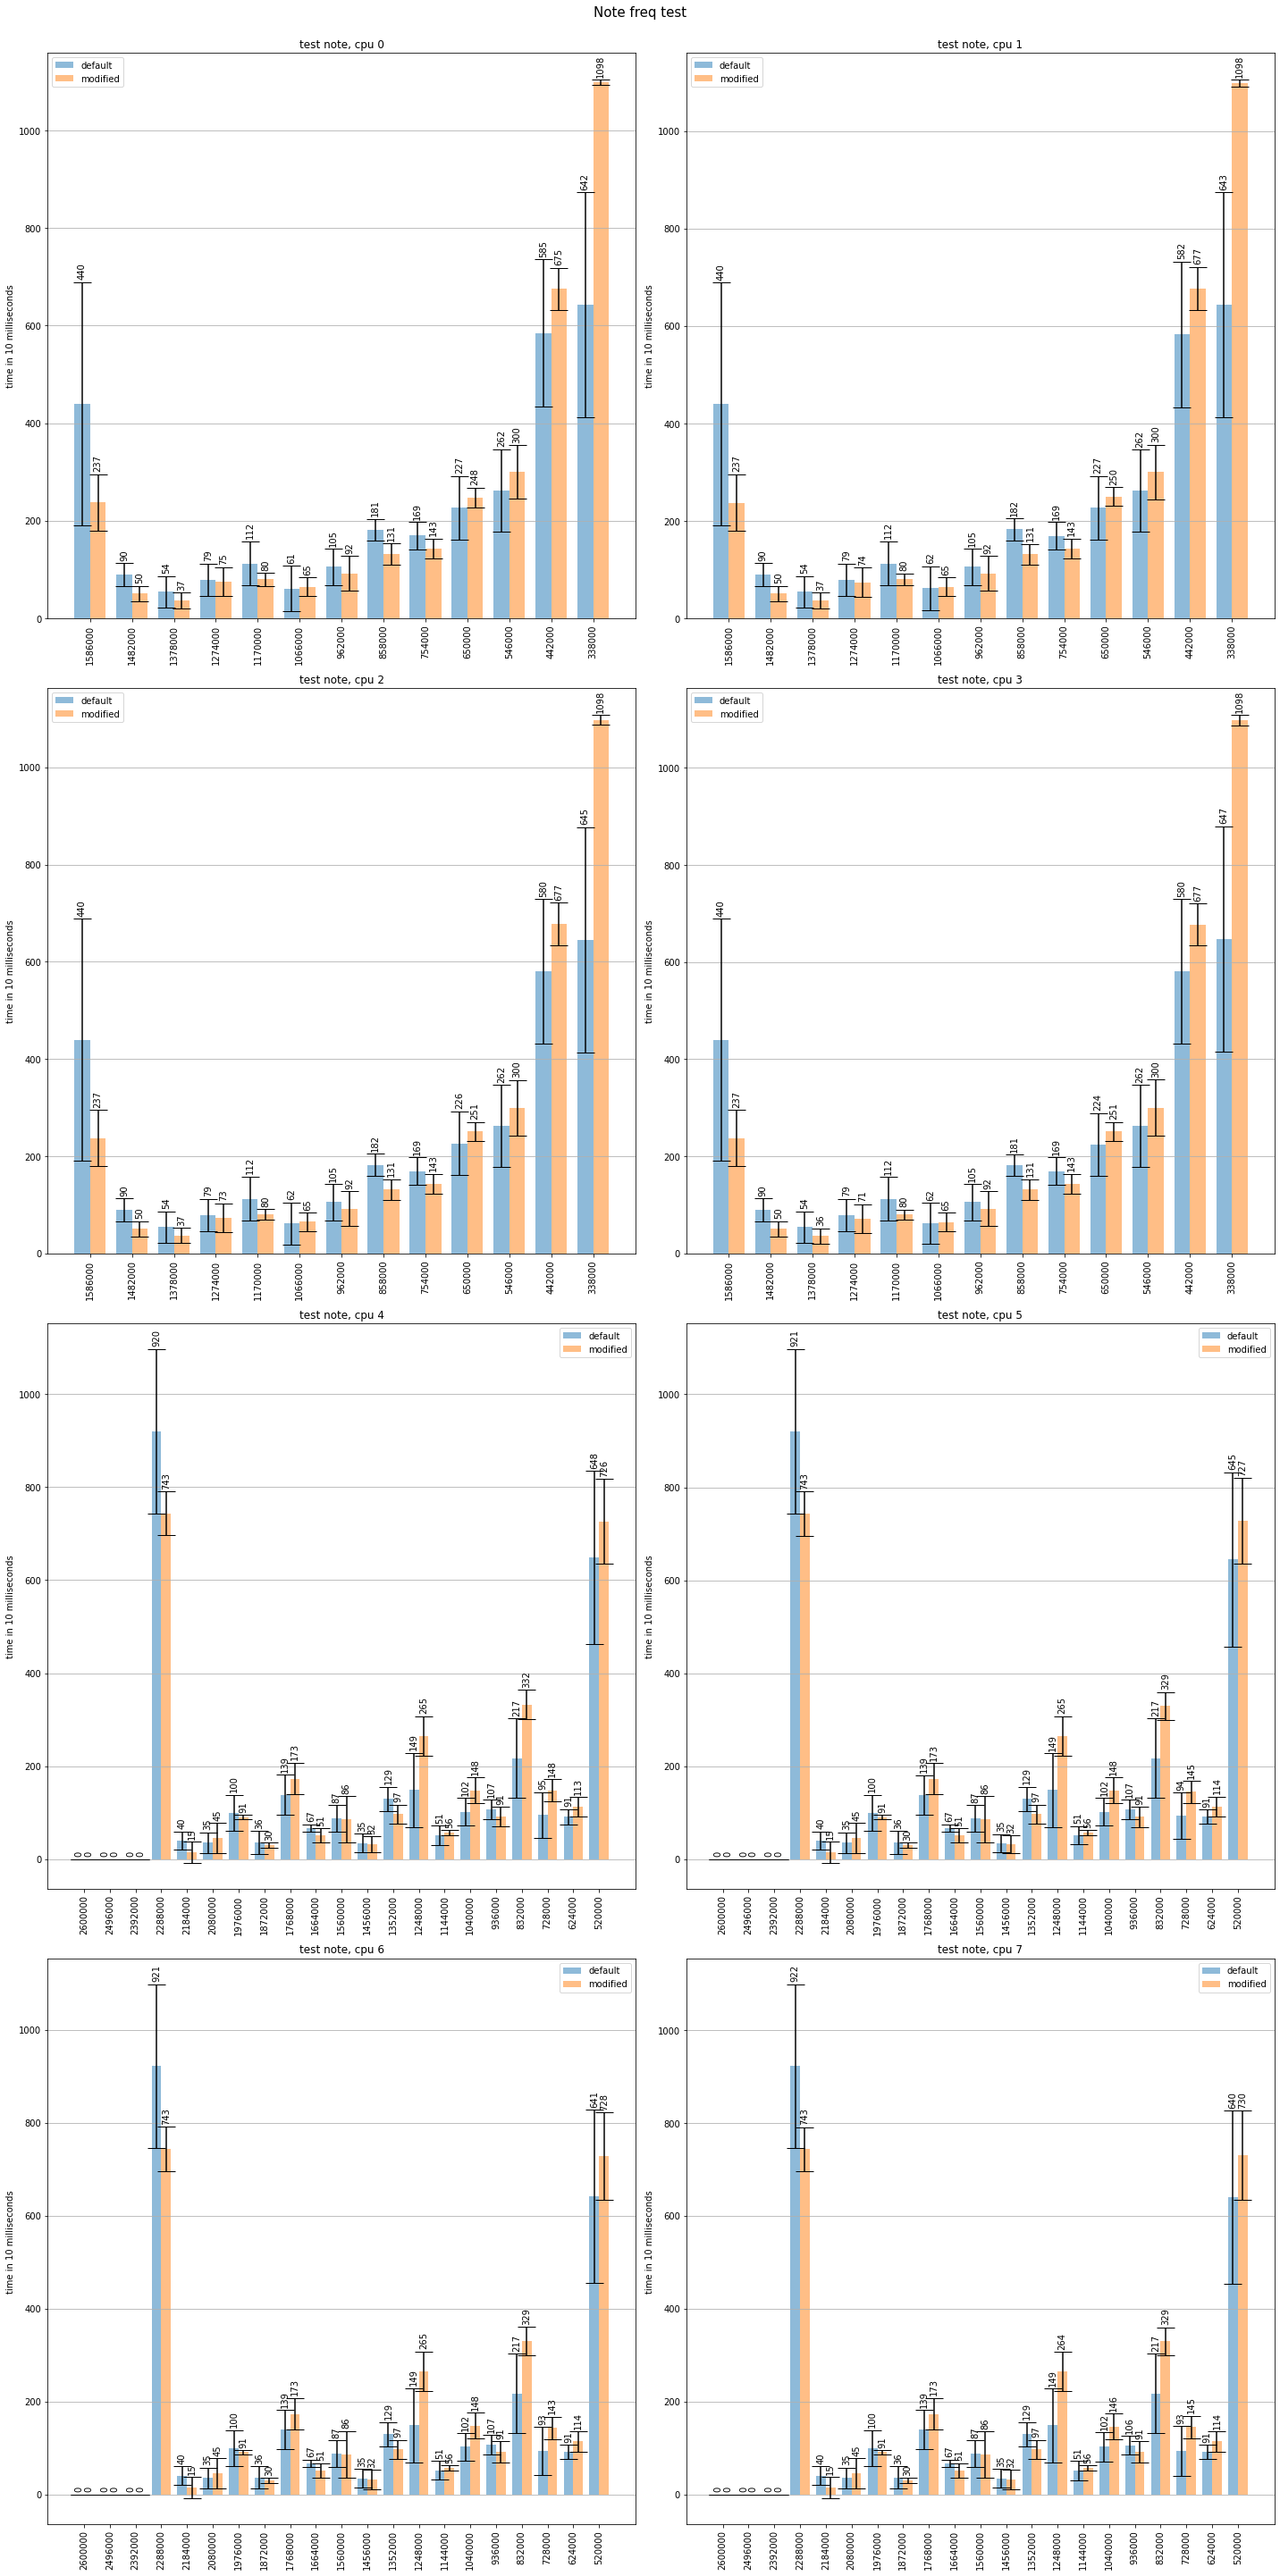

In [26]:
show_cpus_freq_plot("note", "Note freq test")

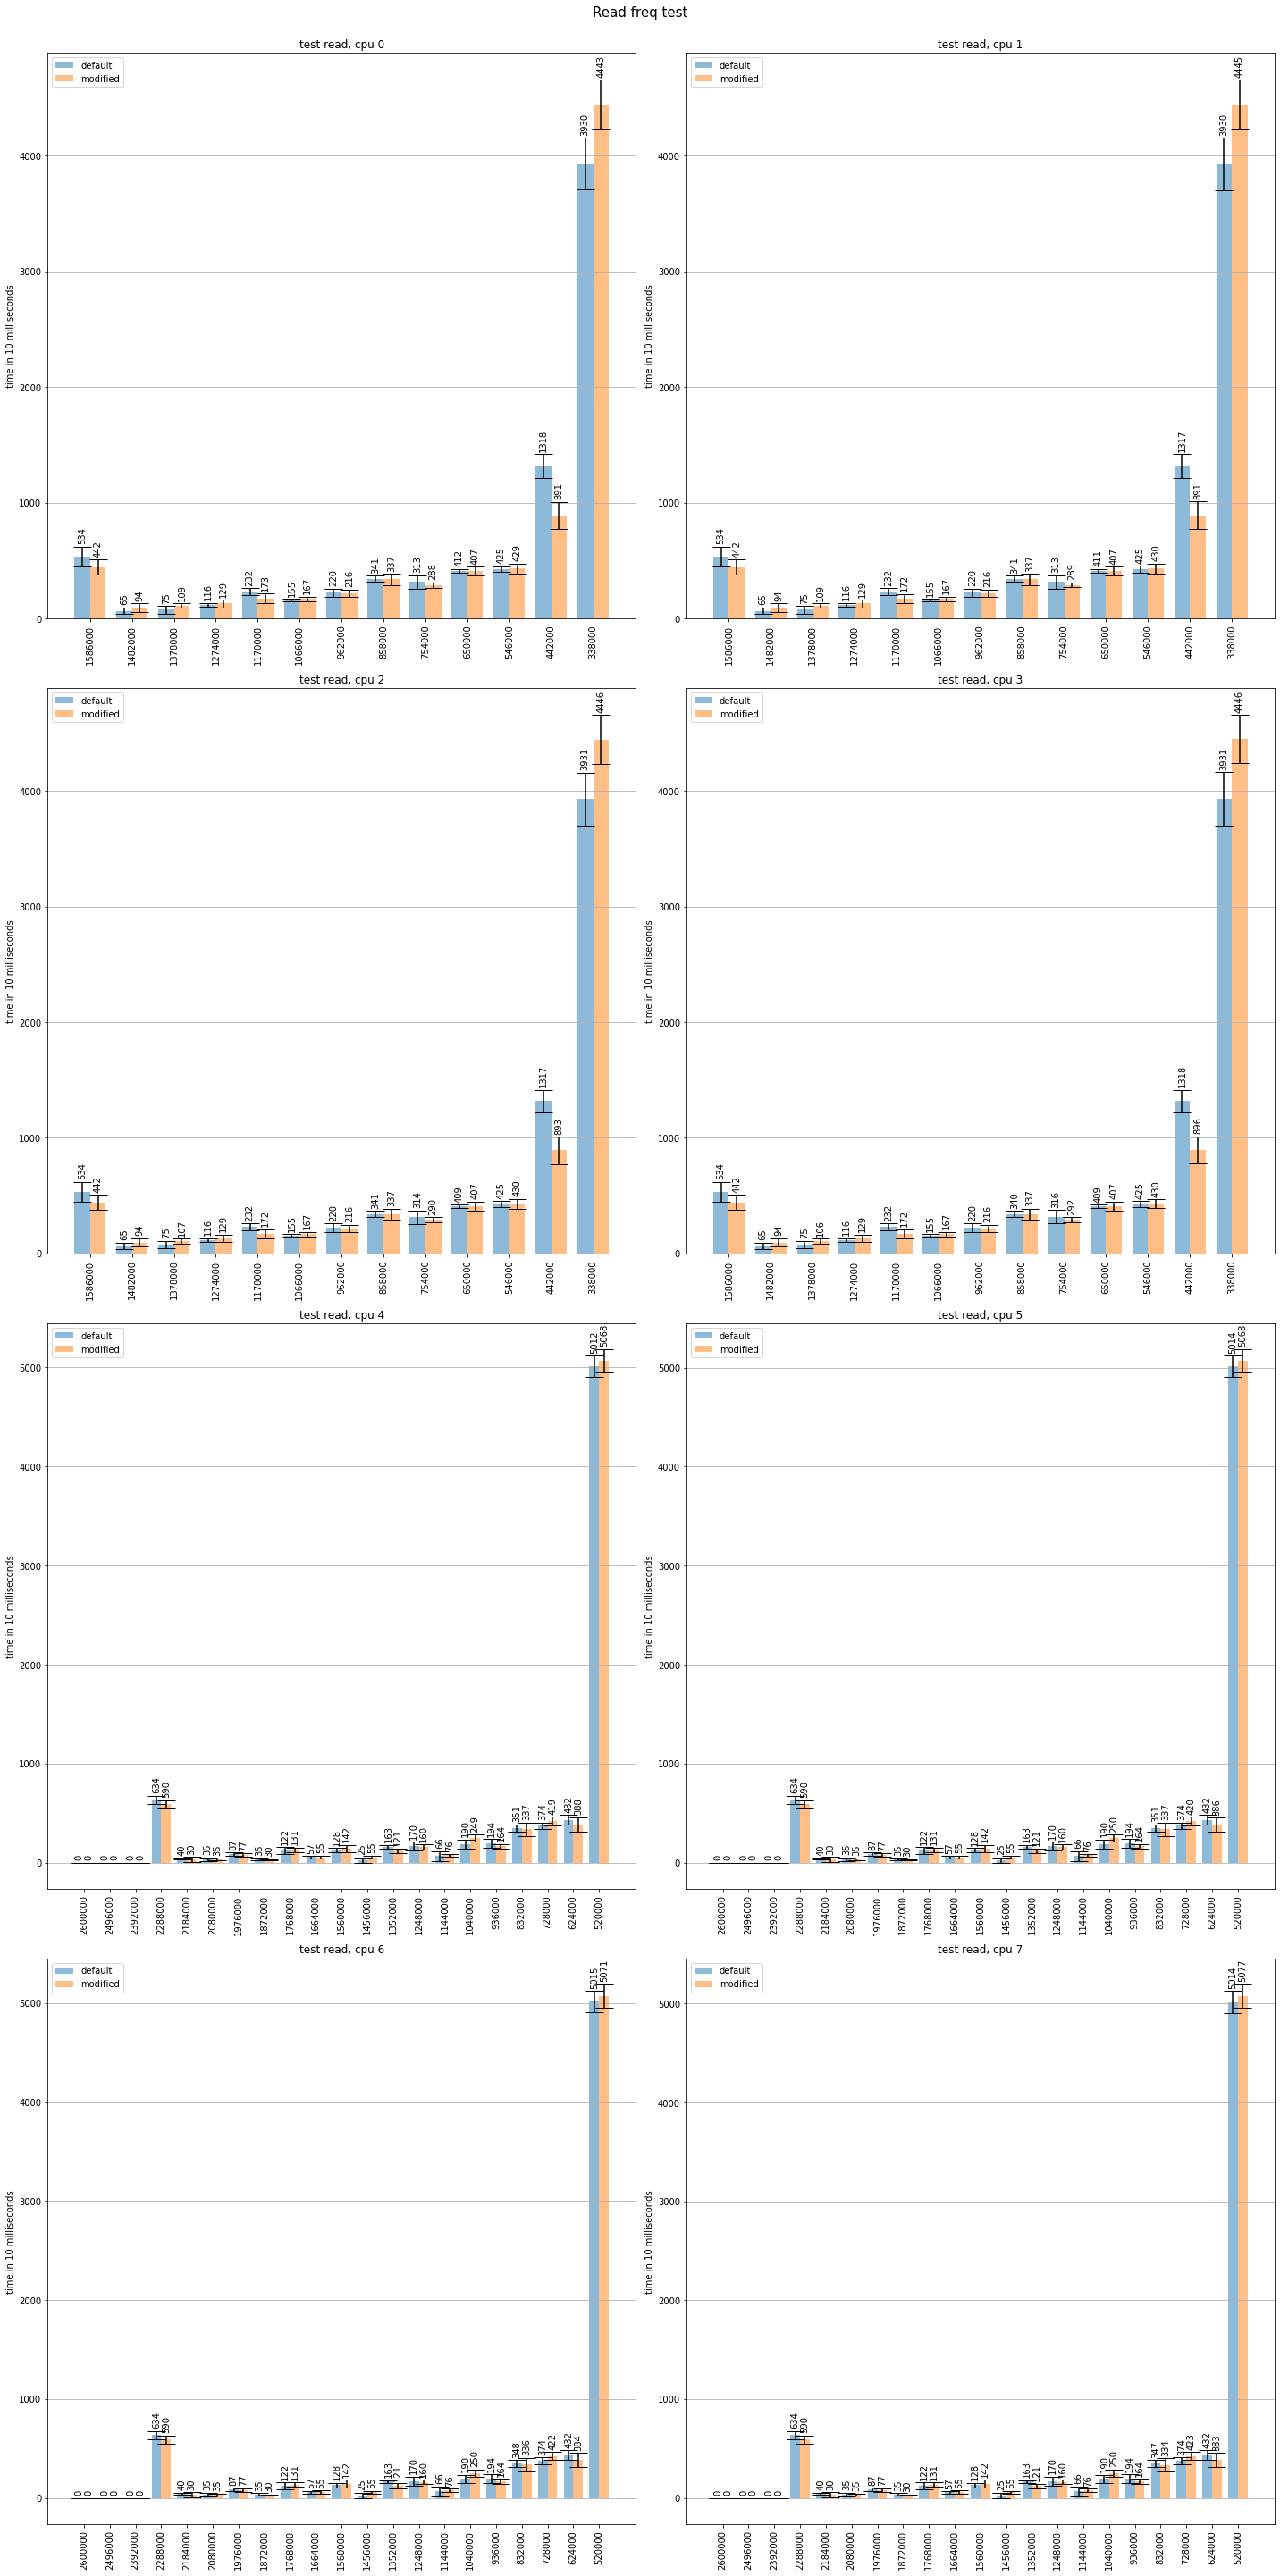

In [27]:
show_cpus_freq_plot("read", "Read freq test")

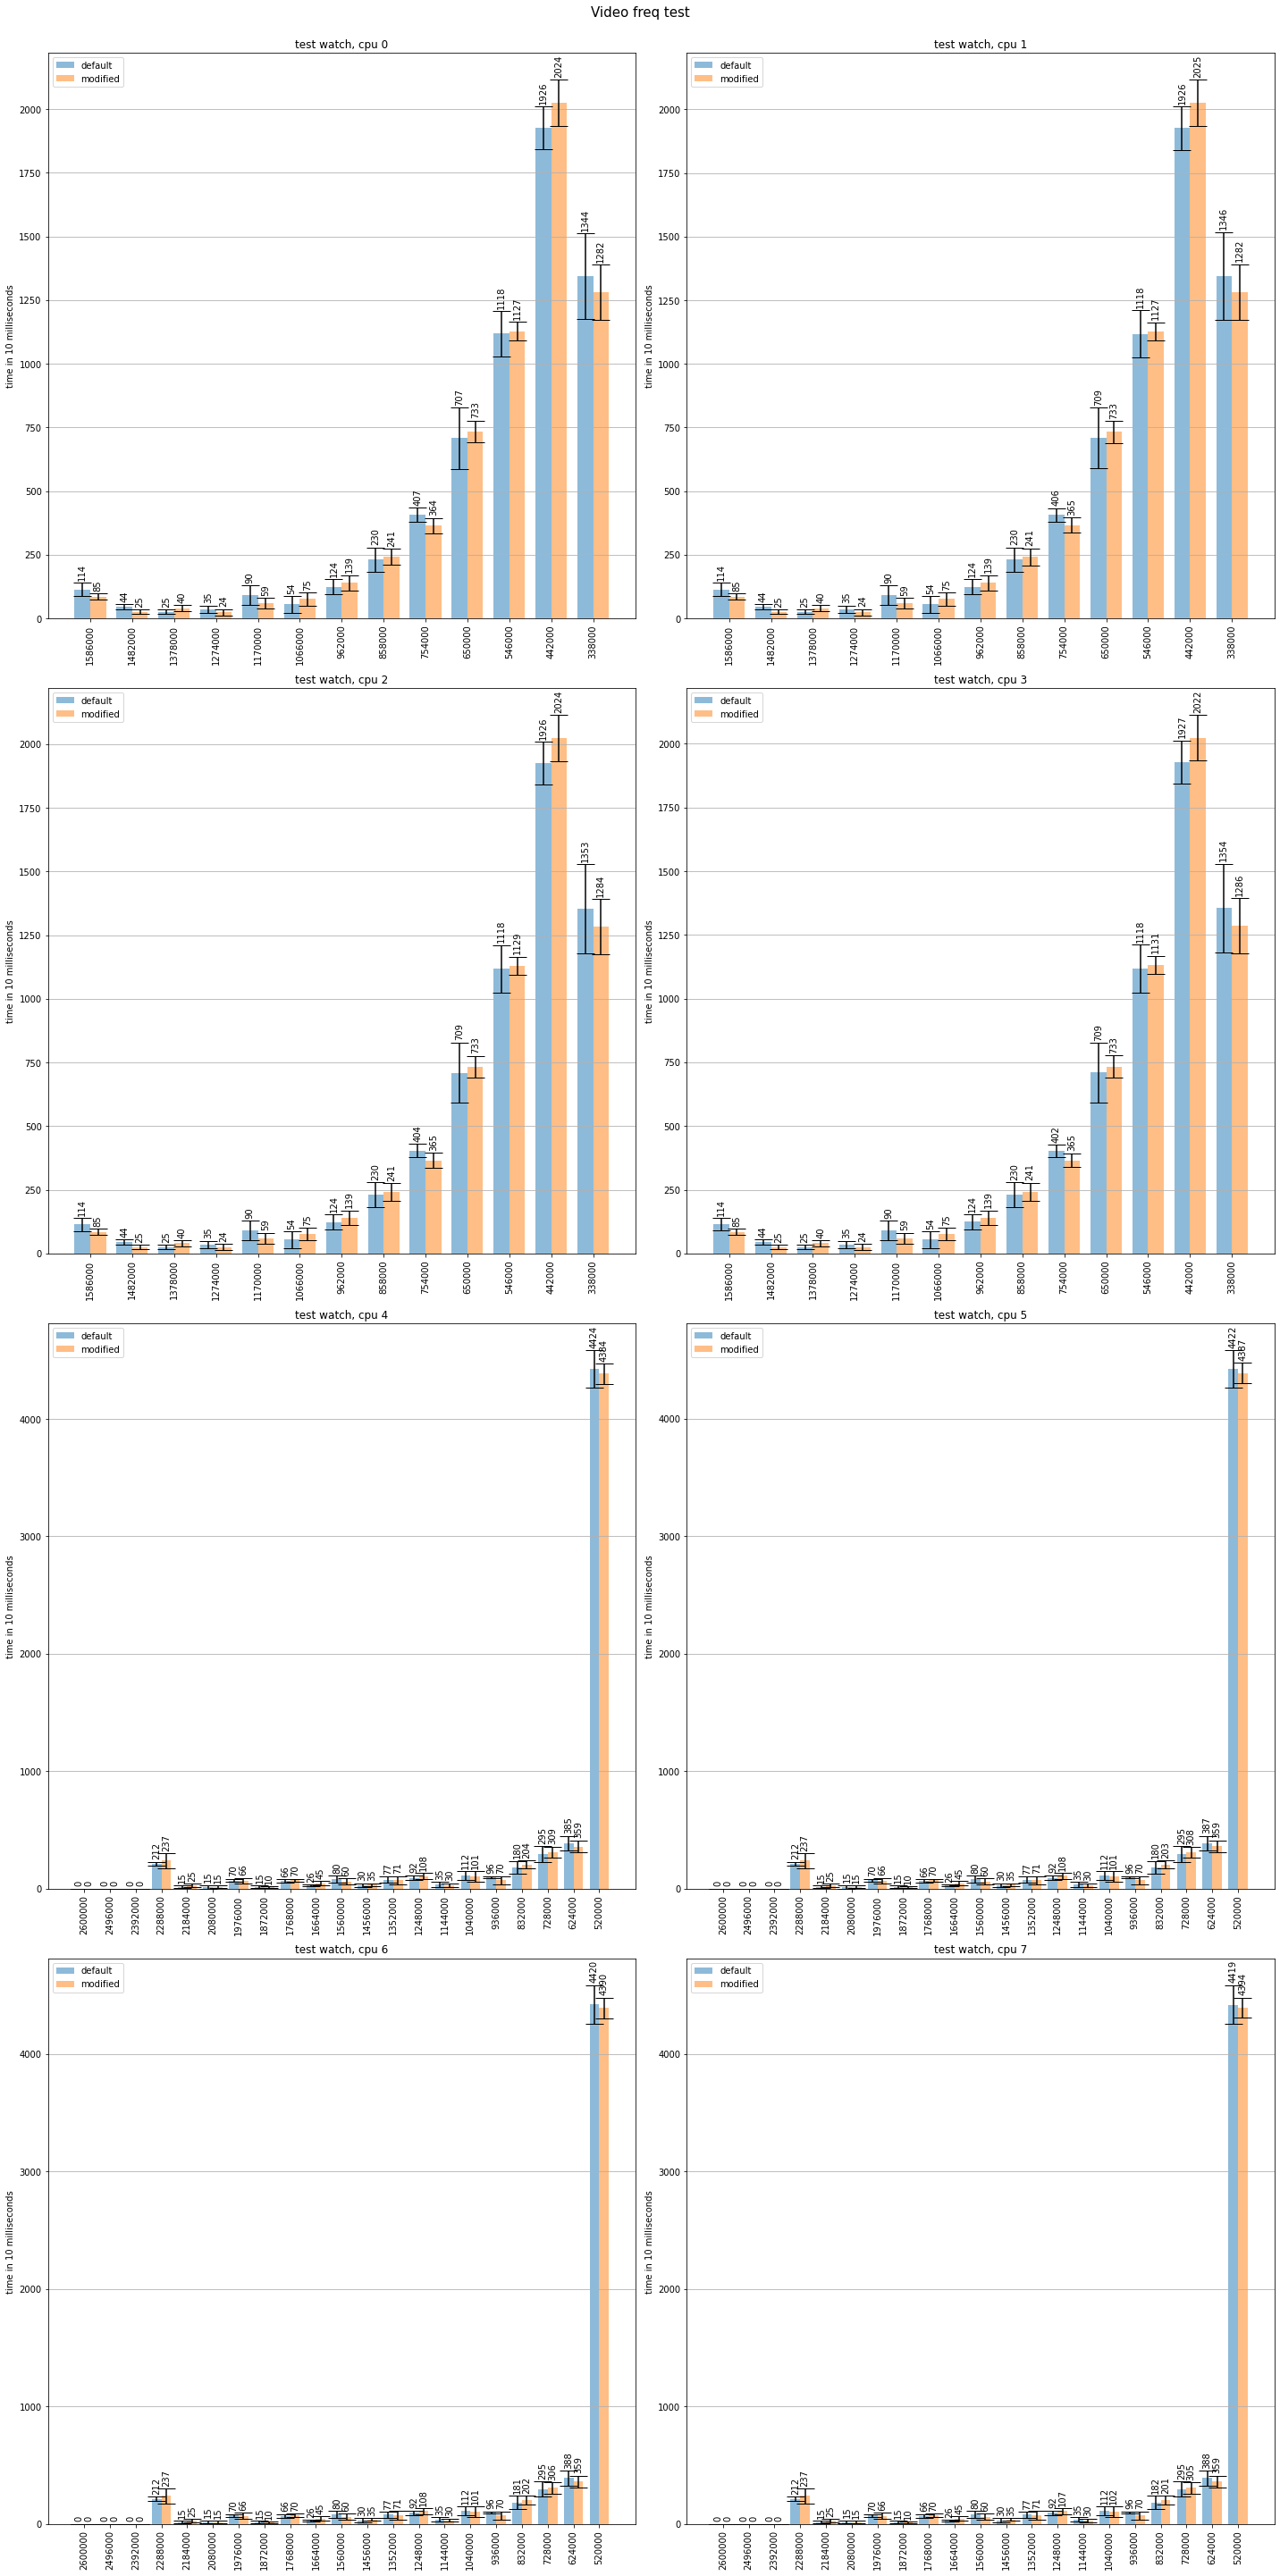

In [28]:
show_cpus_freq_plot("watch", "Video freq test")

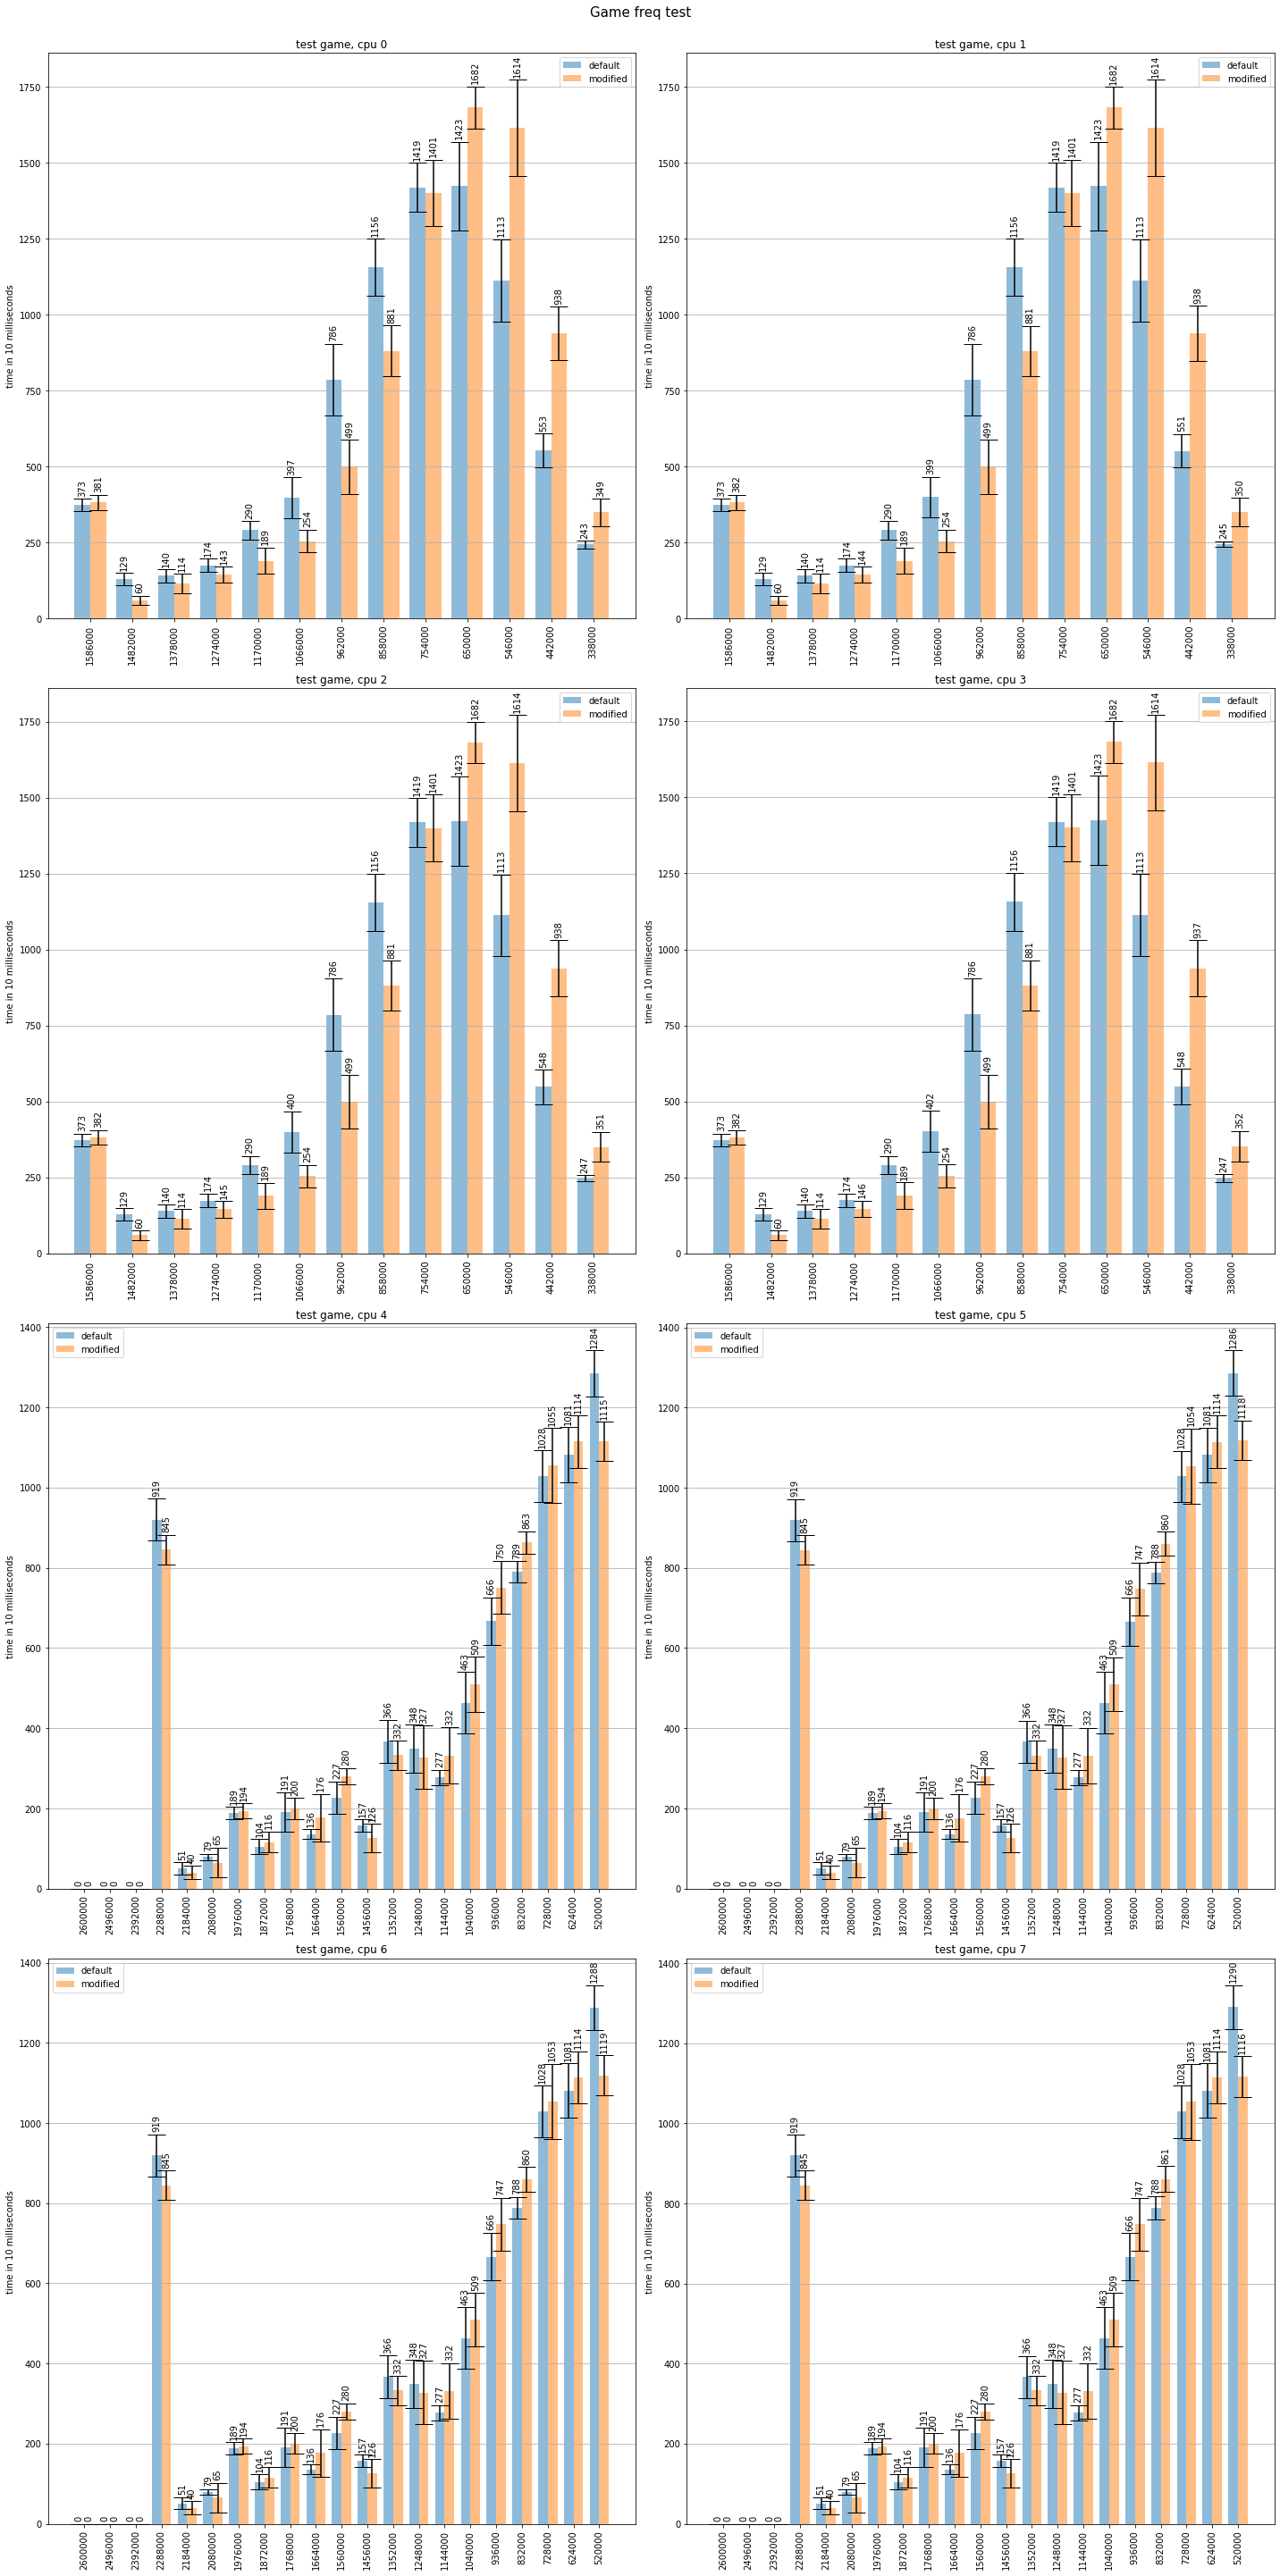

In [29]:
show_cpus_freq_plot("game", "Game freq test")

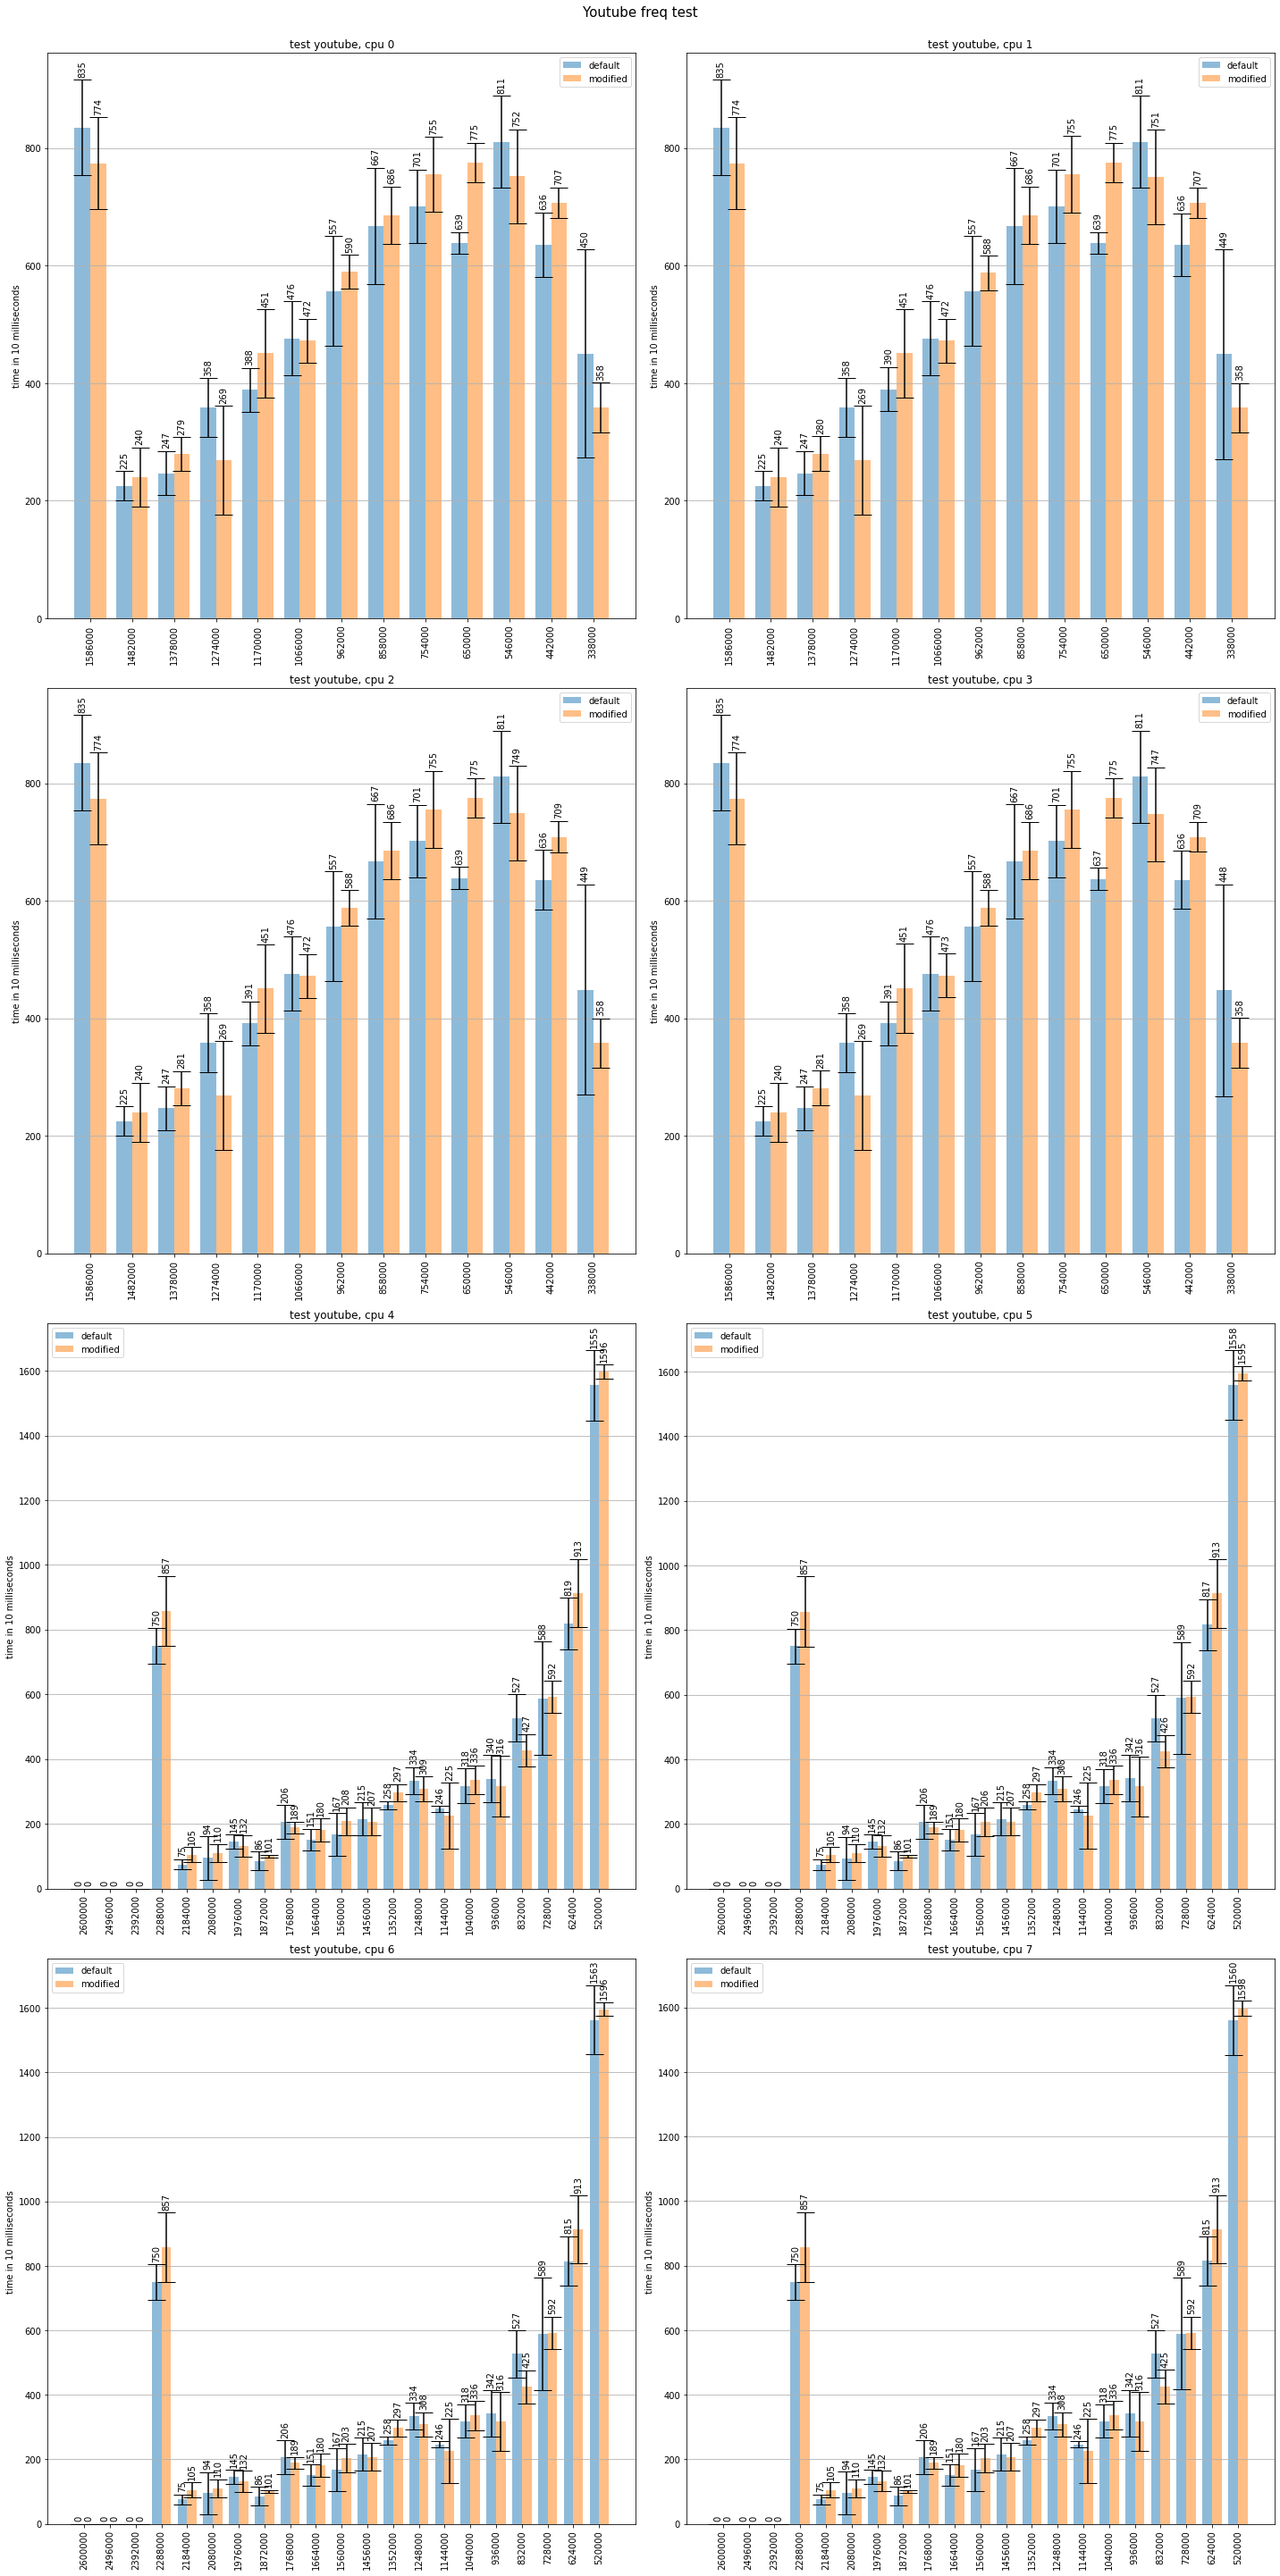

In [30]:
show_cpus_freq_plot("youtube", "Youtube freq test")

## Сравнение производительности
#### Geekbanch5

In [31]:
def get_tests_from_csv_performance(path: str):
    dict_from_csv = pd.read_csv(path).to_dict()
    # print(dict_from_csv)
    return dict_from_csv

def get_tests_set_performance(paths):
    result_dict = dict()
    for name in paths.keys():
        result_dict[name] = get_tests_from_csv_performance(paths[name])
    
    return result_dict

In [32]:
paths = {'default': "D:\\course_work_3\\Performance_test\\default_performance.txt", 
        'modified': "D:\\course_work_3\\Performance_test\\modified_performance.txt"}

performance_res = get_tests_set_performance(paths)

In [33]:
performance_res

{'default': {'single_core': {0: 333, 1: 346, 2: 341, 3: 345},
  'multi_core': {0: 1071, 1: 1009, 2: 1018, 3: 1010}},
 'modified': {'single_core': {0: 345, 1: 330, 2: 331, 3: 341},
  'multi_core': {0: 1066, 1: 974, 2: 1041, 3: 1011}}}

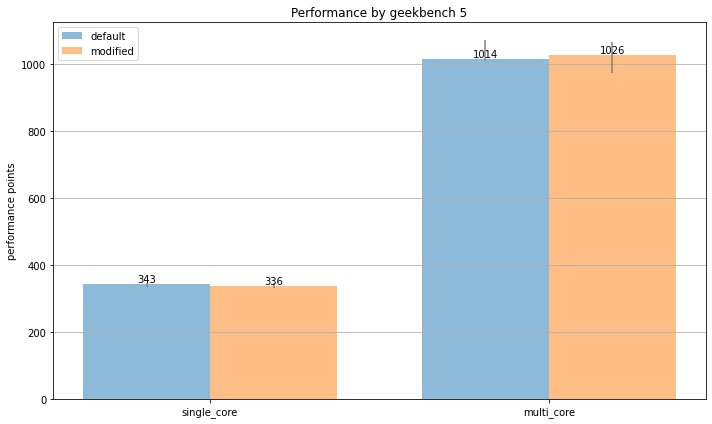

In [34]:
matplotlib.rcParams['figure.figsize'] = [10, 6]
fig, ax = plt.subplots()

N = 2
width = 0.75         # the width of the bars

x_pos = np.arange(0, N * 2, 2)

bar_res = dict()
bar_error = dict()
for s_name in ['default', 'modified']:
    bar_res[s_name] = [np.median(list(performance_res[s_name]['single_core'].values())),
                       np.median(list(performance_res[s_name]['multi_core'].values()))]
    
    bar_error[s_name] = [np.std(list(performance_res[s_name]['single_core'].values())),
                       np.std(list(performance_res[s_name]['multi_core'].values()))]

#yerr=bar_error['default'],
bar_def = ax.bar(x_pos, bar_res['default'],
                 width,
                 align='center', alpha=0.5, ecolor='black', capsize=10)

#yerr=bar_error['modified'],
bar_mod = ax.bar(x_pos + width, bar_res['modified'],
                 width,
                 align='center', alpha=0.5, ecolor='black', capsize=10)



ax.set_ylabel('performance points')
ax.set_xticks([pos + 0.5 * width for pos in x_pos])
ax.set_xticklabels(['single_core', 'multi_core'])
ax.set_title('Performance by geekbench 5')
ax.yaxis.grid(True)
ax.bar_label(bar_def)
ax.bar_label(bar_mod)
ax.legend((bar_def[0], bar_mod[0]), ('default', 'modified'))


error_dct = dict()
for i in range(2):
    for name in ['default', 'modified']:
        error_dct[bar_res[name][i]] = dict()
error_dct[bar_res['default'][0]]['min'] = np.min(list(performance_res['default']['single_core'].values()))
error_dct[bar_res['default'][0]]['max'] = np.max(list(performance_res['default']['single_core'].values()))

error_dct[bar_res['modified'][0]]['min'] = np.min(list(performance_res['modified']['single_core'].values()))
error_dct[bar_res['modified'][0]]['max'] = np.max(list(performance_res['modified']['single_core'].values()))

error_dct[bar_res['default'][1]]['min'] = np.min(list(performance_res['default']['multi_core'].values()))
error_dct[bar_res['default'][1]]['max'] = np.max(list(performance_res['default']['multi_core'].values()))

error_dct[bar_res['modified'][1]]['min'] = np.min(list(performance_res['modified']['multi_core'].values()))
error_dct[bar_res['modified'][1]]['max'] = np.max(list(performance_res['modified']['multi_core'].values()))
    
# add the lines for the errors 
for i, p in enumerate(ax.patches):
    x = p.get_x()  # get the bottom left x corner of the bar
    w = p.get_width()  # get width of bar
    h = p.get_height()  # get height of bar
    min_y = error_dct[h]['min']  # use h to get min from dict z
    max_y = error_dct[h]['max']  # use h to get max from dict z
    plt.vlines(x+w/2, min_y, max_y, color='gray')  # draw a vertical line
    #print(i,"---" ,h)

plt.tight_layout()
plt.savefig('performance_geekbench_5.png')
plt.show()